In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, confusion_matrix

# set plot size
#plt.rcParams['figure.figsize'] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [26]:
file = 'https://raw.githubusercontent.com/andreduong-zz/credit-card-clustering/master/CC%20GENERAL.csv'
df = pd.read_csv(file)

df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [27]:
df.shape

(8950, 18)

In [28]:
df.loc[(df["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = df["CREDIT_LIMIT"].mean()
df.loc[(df["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"] = 0

<AxesSubplot:>

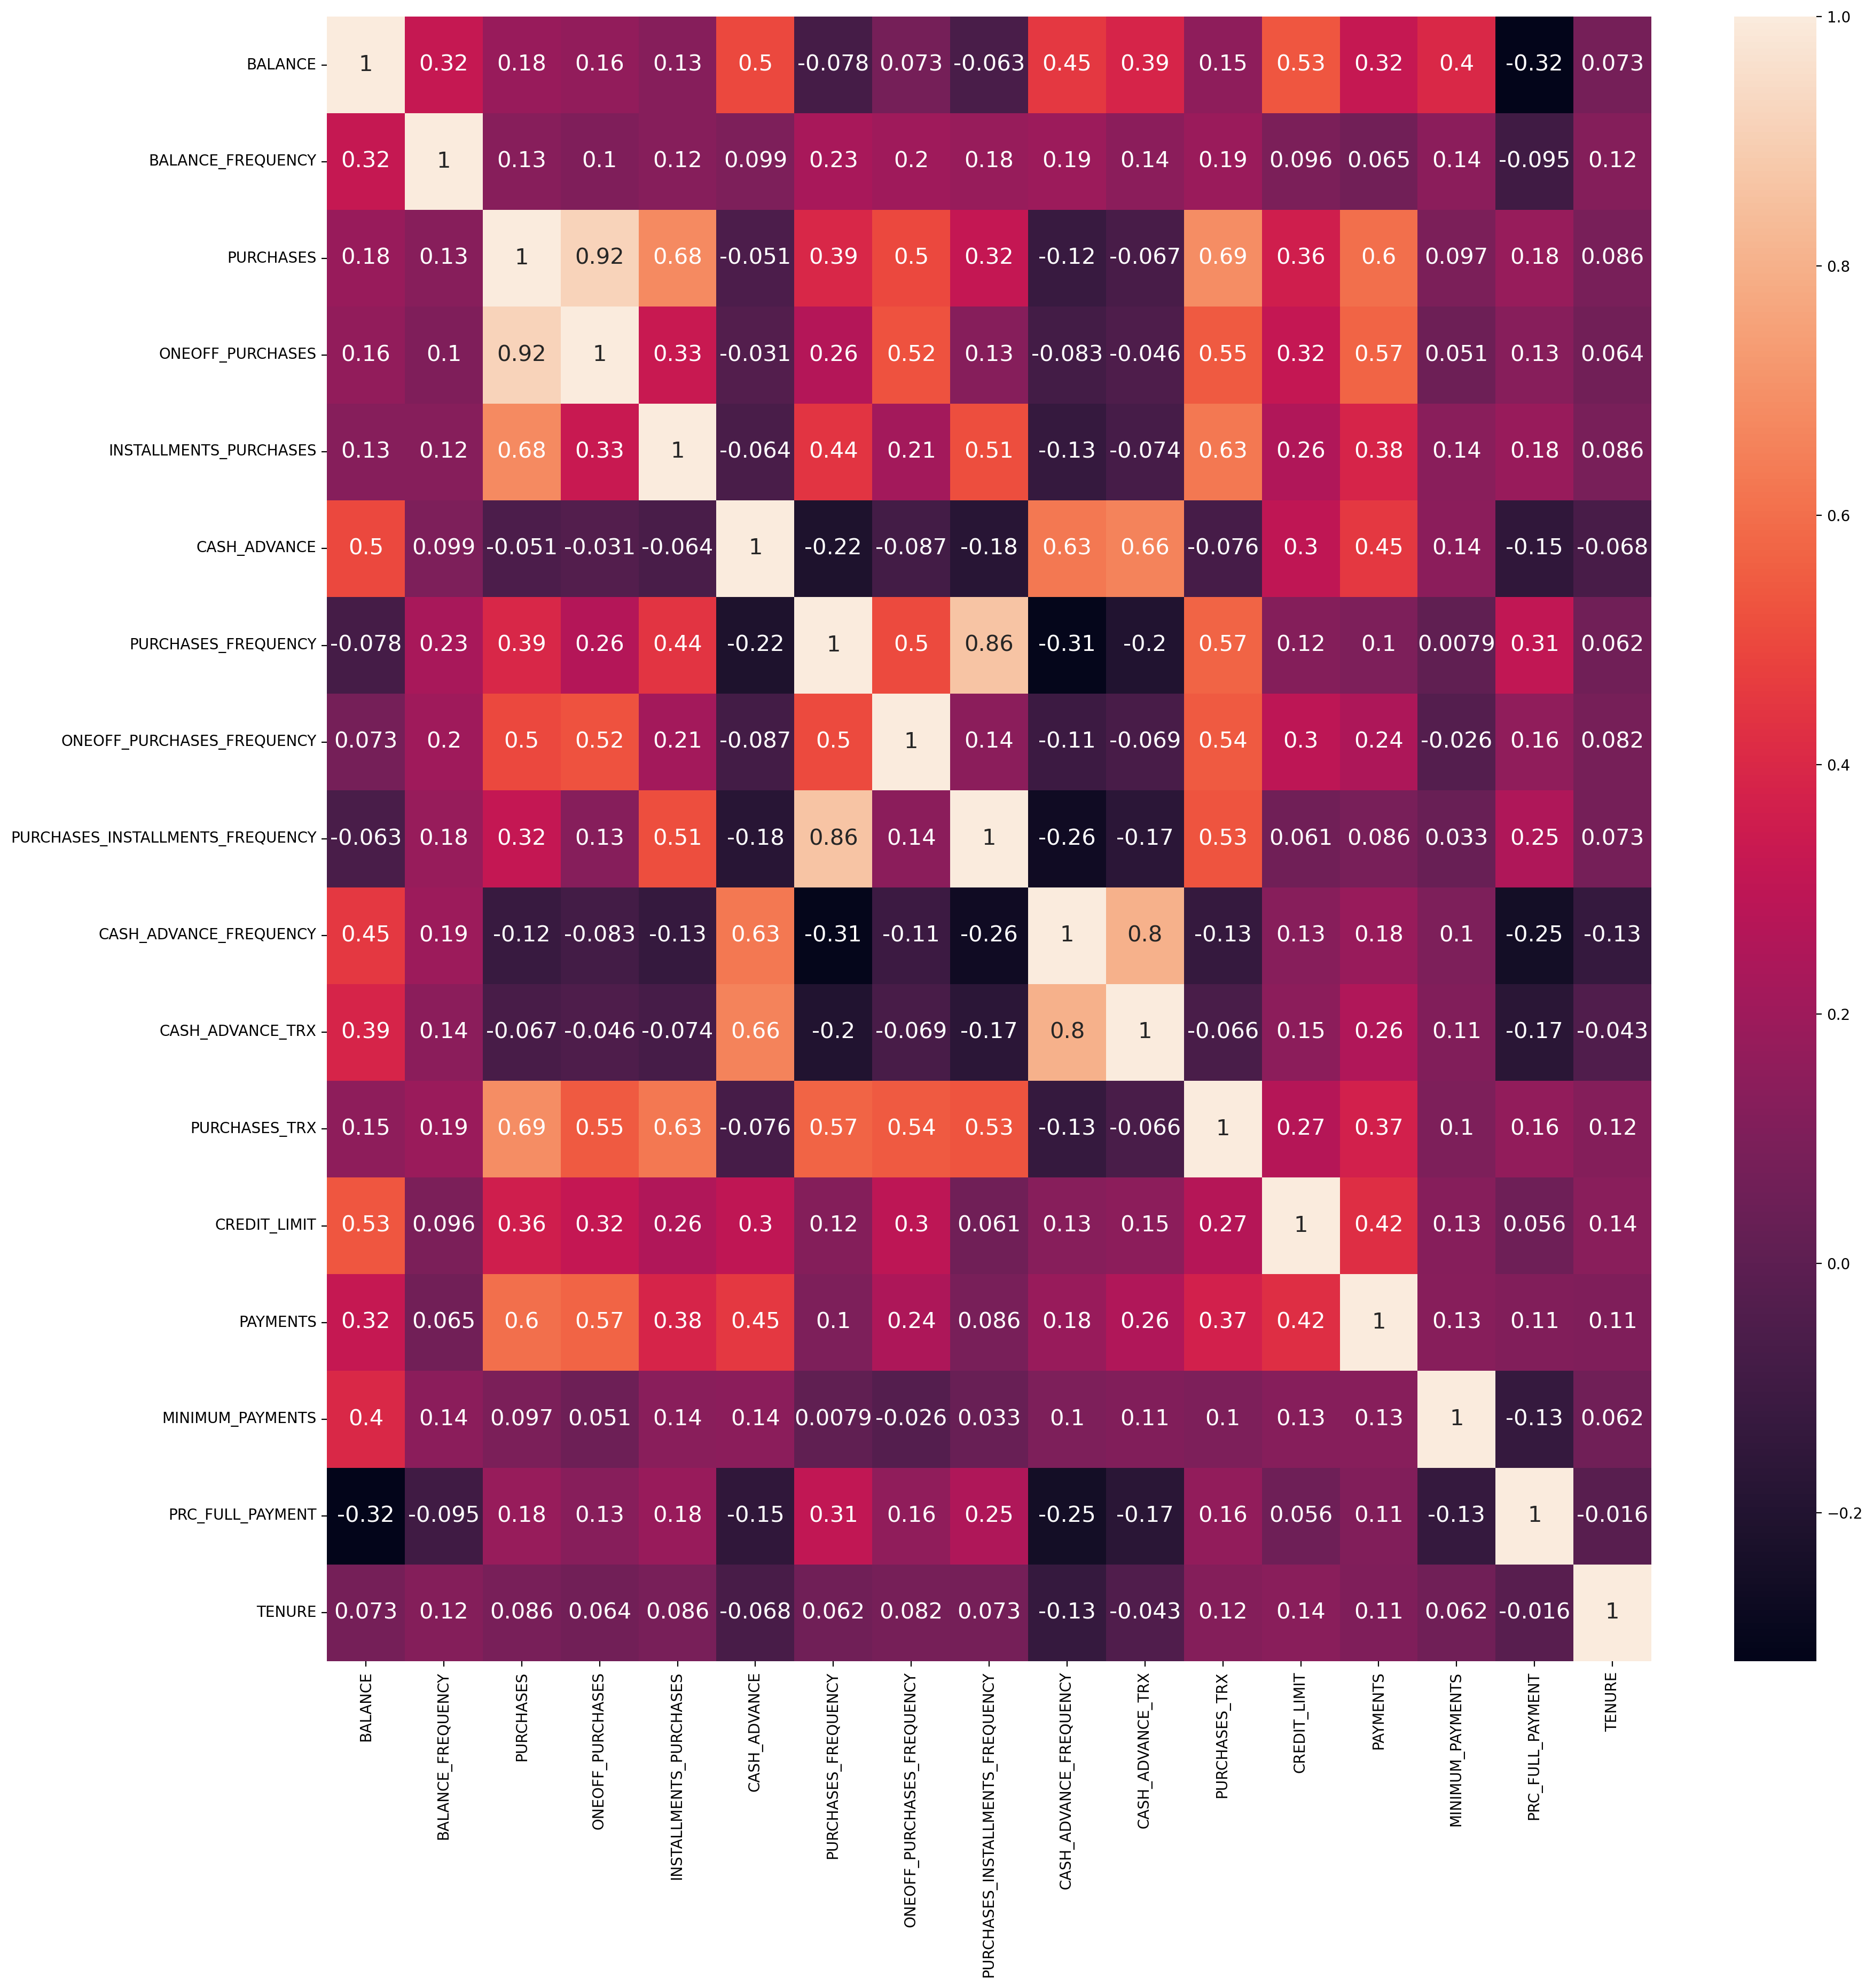

In [29]:
corr = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot = True, annot_kws= {'size' : 15})

### Correlazioni
Le features con correlazione maggiore o uguale a 0.7 sono:

- PURCHEASES e ONEOFF_PURCHASES	(0.92)
- CASH_ADVANCE_TRX e  CASH_ADVANCE_FREQUENCY (0.8)
- PURCHASES_FREQUENCY e PURCHASES_INSTALLMENTS_FREQUENCY (0.86)

### Deleting

- CASH_ADVANCE_FREQUENCY 
- PURCHASES_FREQUENCY
- ONEOFF_PURCHASES

In [30]:
df = df.drop(columns = ['CUST_ID','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES'])

In [31]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

X = df_scaled

In [32]:
df_x = pd.DataFrame(X, columns = df.columns)

<AxesSubplot:>

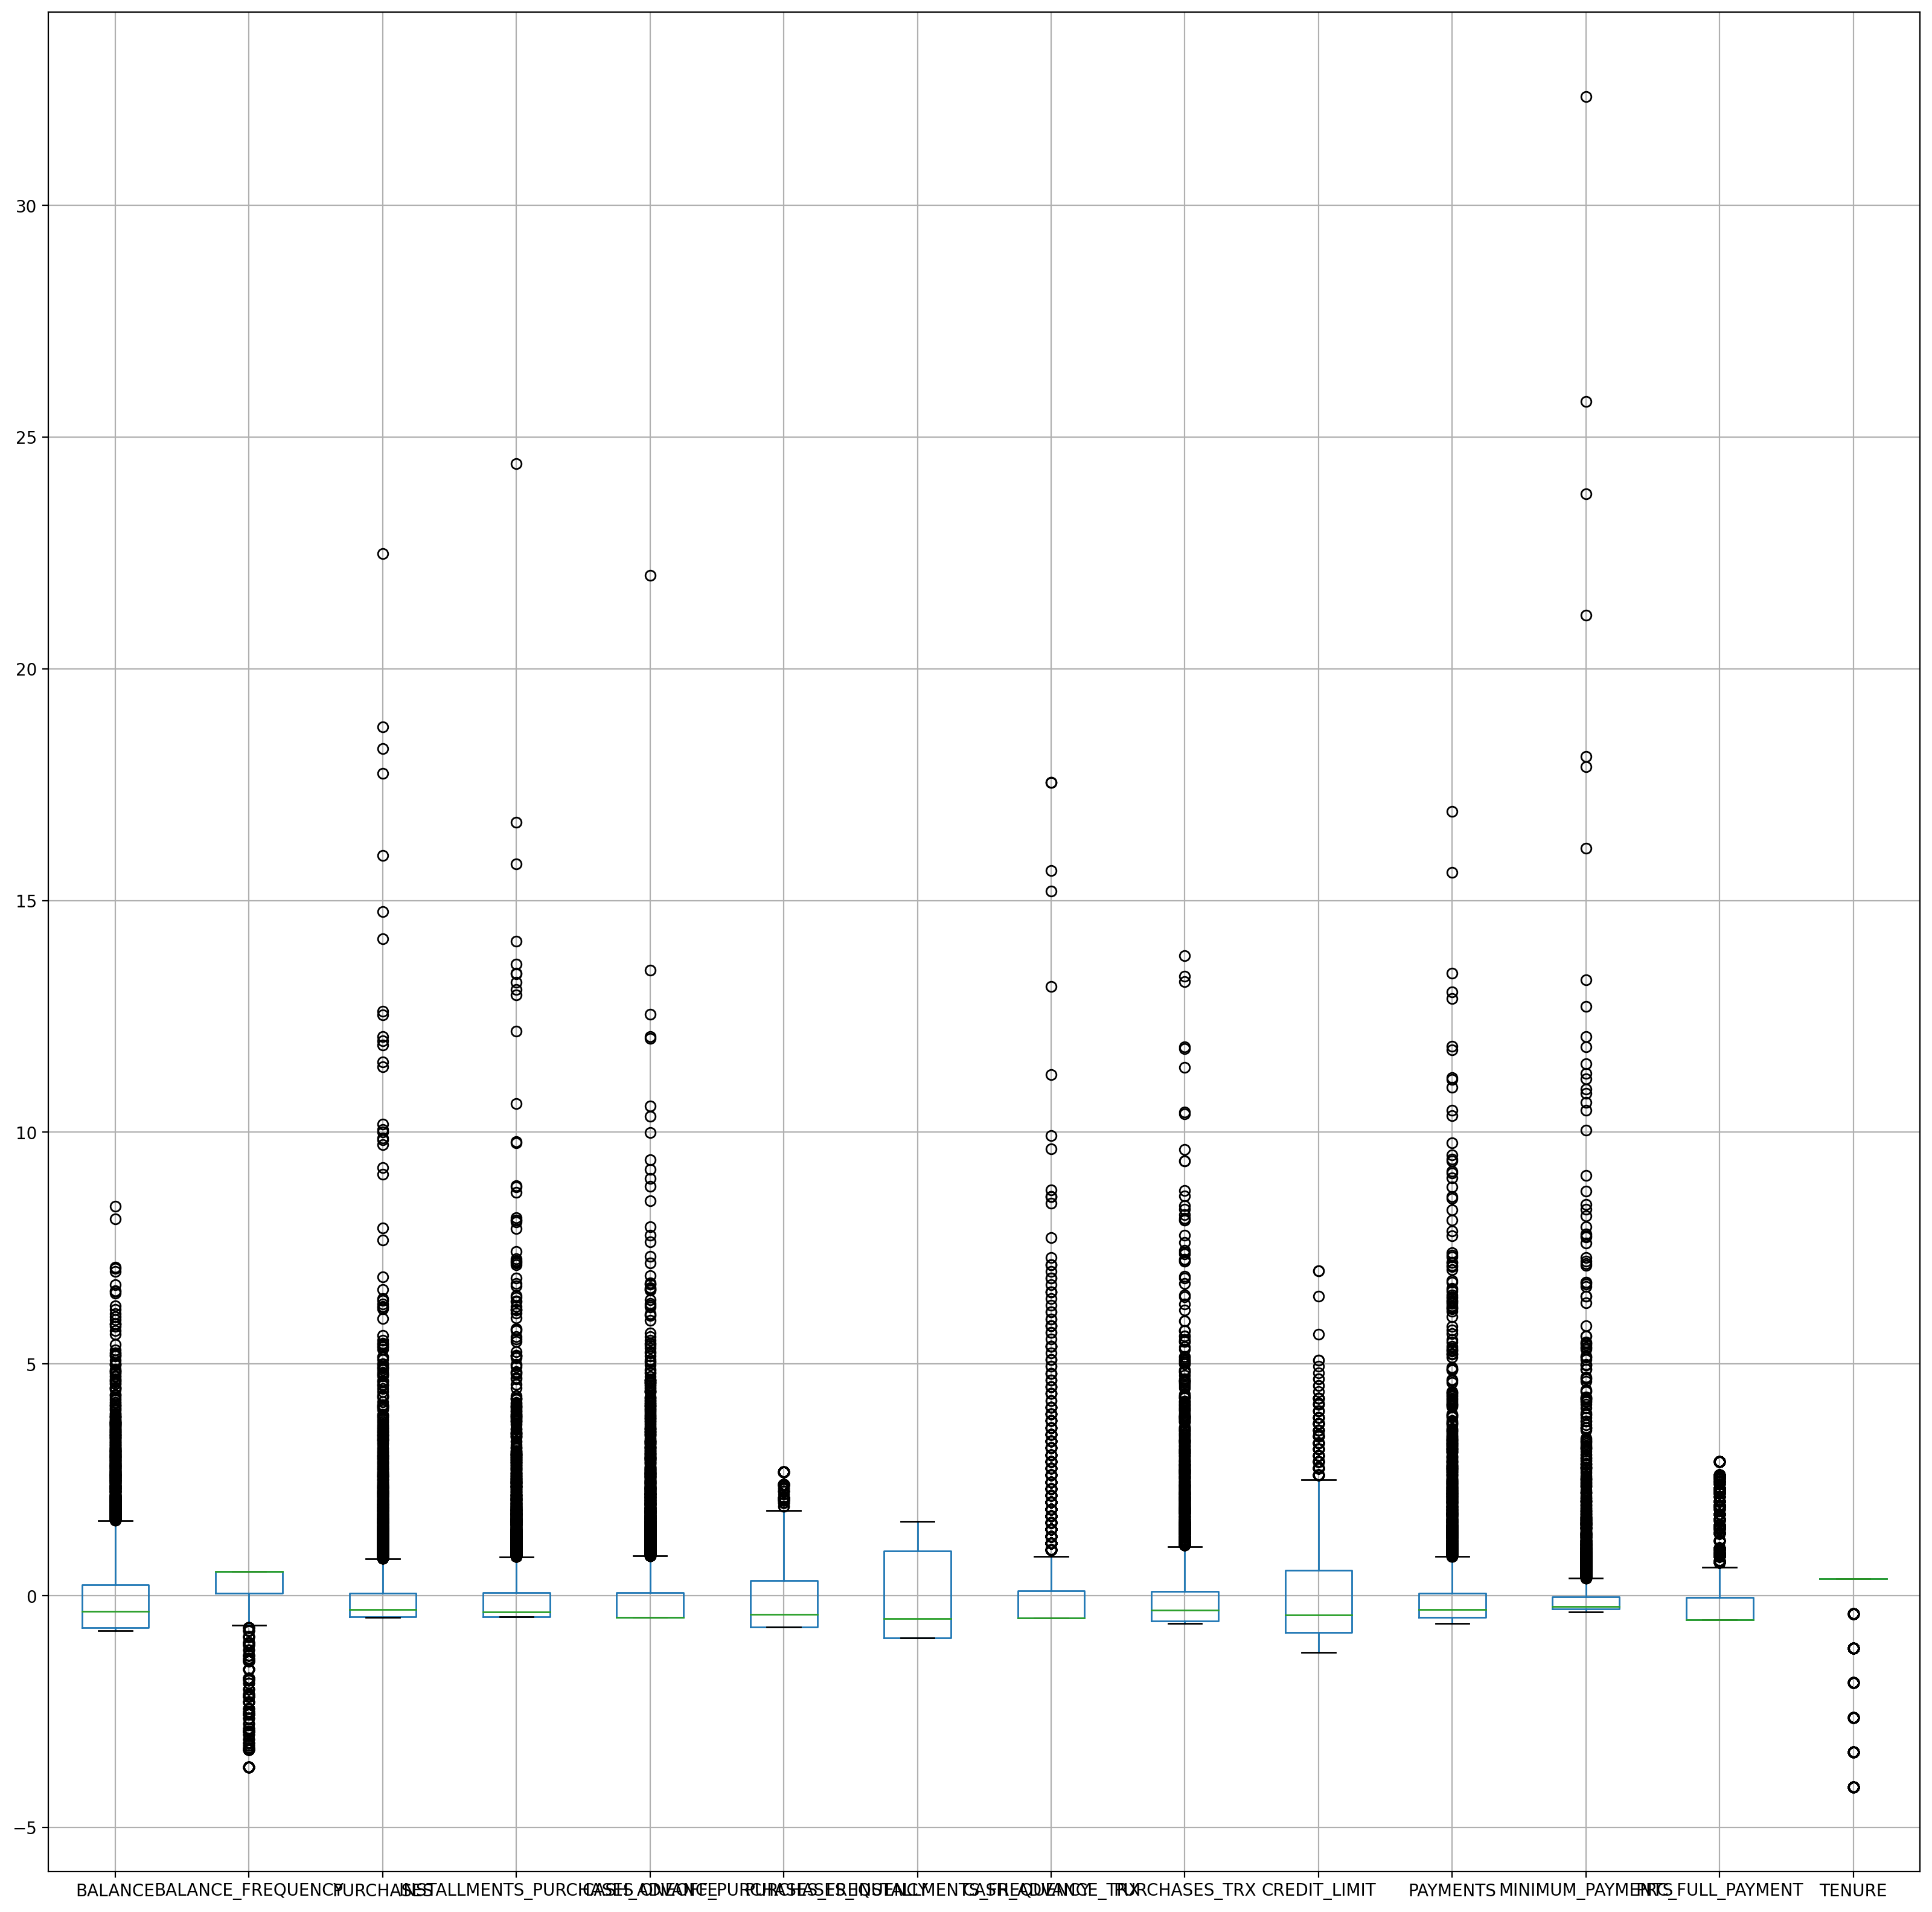

In [33]:
plt.figure(figsize=(20, 20))
df_x.boxplot() 

In [34]:
print(df_x.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [35]:
df_x.loc[(df_x["BALANCE"] > 3), "BALANCE"] = 3
df_x.loc[(df_x["BALANCE_FREQUENCY"] < -3), "BALANCE_FREQUENCY"] = -3
df_x.loc[(df_x["PURCHASES"] > 3), "PURCHASES"] = 3
df_x.loc[(df_x["INSTALLMENTS_PURCHASES"] > 3), "INSTALLMENTS_PURCHASES"] = 3
df_x.loc[(df_x["CASH_ADVANCE"] > 3), "CASH_ADVANCE"] = 3
df_x.loc[(df_x["ONEOFF_PURCHASES_FREQUENCY"] > 3), "ONEOFF_PURCHASES_FREQUENCY"] = 3
df_x.loc[(df_x["PURCHASES_INSTALLMENTS_FREQUENCY"] > 3), "PURCHASES_INSTALLMENTS_FREQUENCY"] = 3
df_x.loc[(df_x["CASH_ADVANCE_TRX"] > 3), "CASH_ADVANCE_TRX"] = 3
df_x.loc[(df_x["PURCHASES_TRX"] > 3), "PURCHASES_TRX"] = 3
df_x.loc[(df_x["CREDIT_LIMIT"] > 3), "CREDIT_LIMIT"] = 3
df_x.loc[(df_x["PAYMENTS"] > 3), "PAYMENTS"] = 3
df_x.loc[(df_x["MINIMUM_PAYMENTS"] > 3), "MINIMUM_PAYMENTS"] = 3
df_x.loc[(df_x["PRC_FULL_PAYMENT"] > 3), "PRC_FULL_PAYMENT"] = 3
df_x.loc[(df_x["TENURE"] < -3), "TENURE"] = -3

<AxesSubplot:>

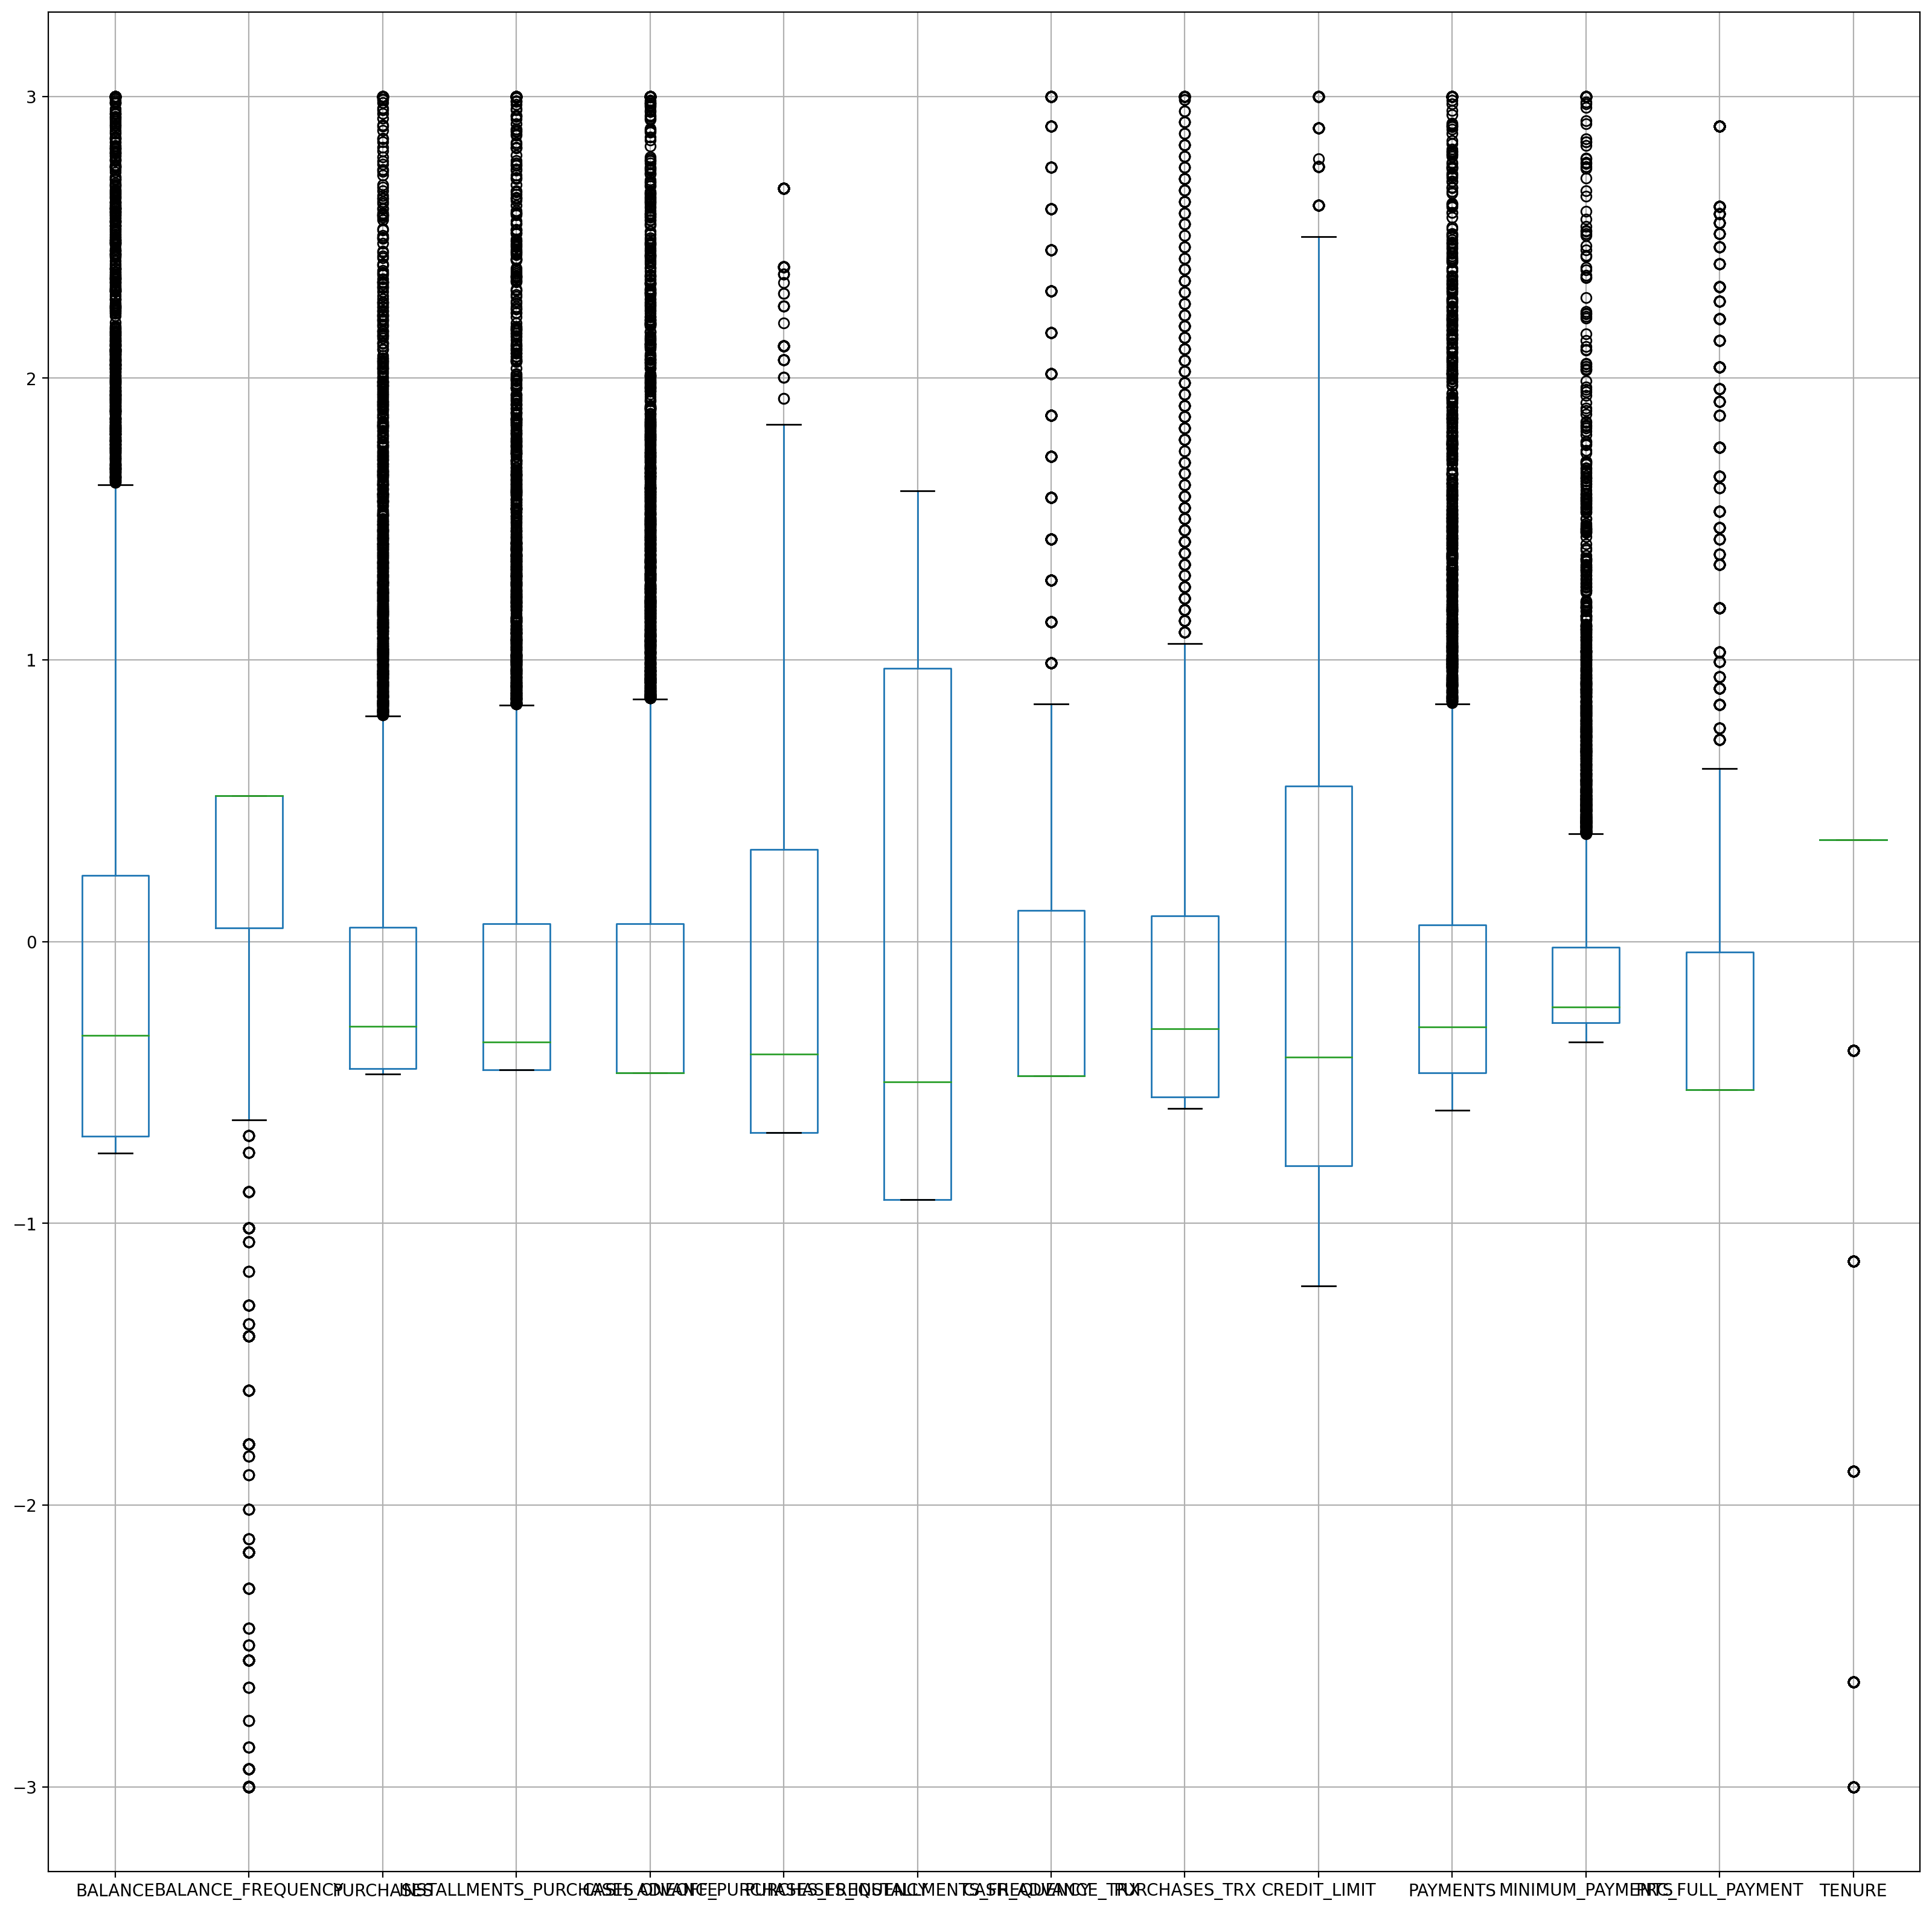

In [36]:
plt.figure(figsize=(20, 20))
df_x.boxplot() 

In [43]:
X = df_x.to_numpy()

For n_clusters = 2 The average silhouette_score is : 0.26672952615722345
For n_clusters = 3 The average silhouette_score is : 0.23549742800307732
For n_clusters = 4 The average silhouette_score is : 0.2109029020472226
For n_clusters = 5 The average silhouette_score is : 0.21013152031989496
For n_clusters = 6 The average silhouette_score is : 0.2262722540343018
For n_clusters = 7 The average silhouette_score is : 0.23496153539708398
For n_clusters = 8 The average silhouette_score is : 0.23482000307851372
For n_clusters = 9 The average silhouette_score is : 0.2374214033945998


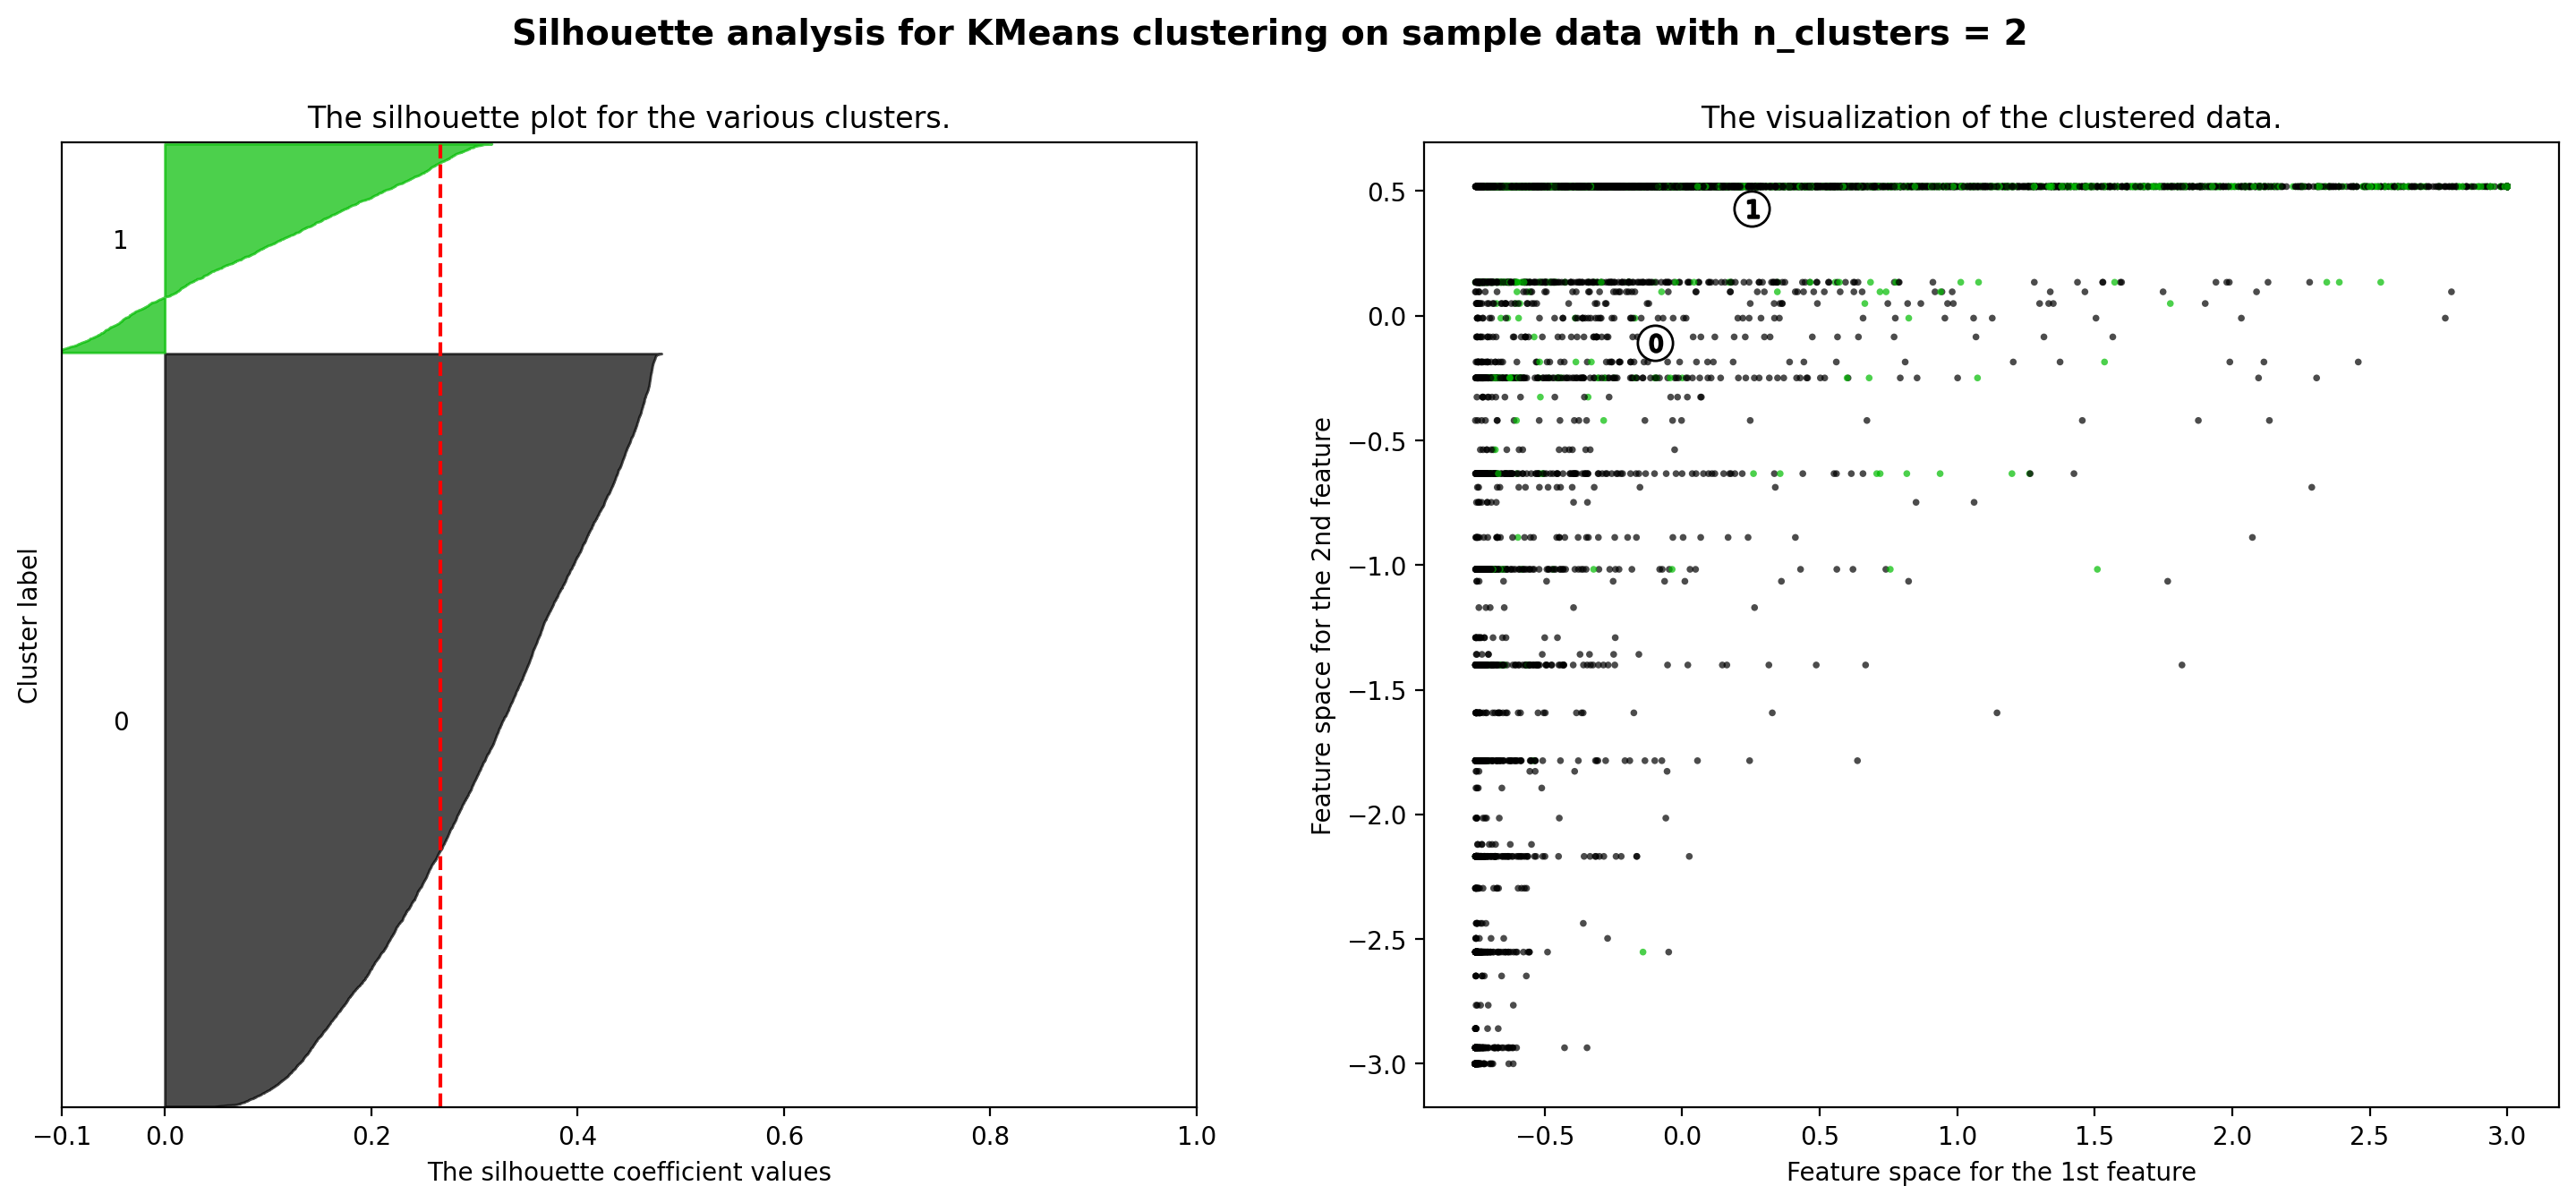

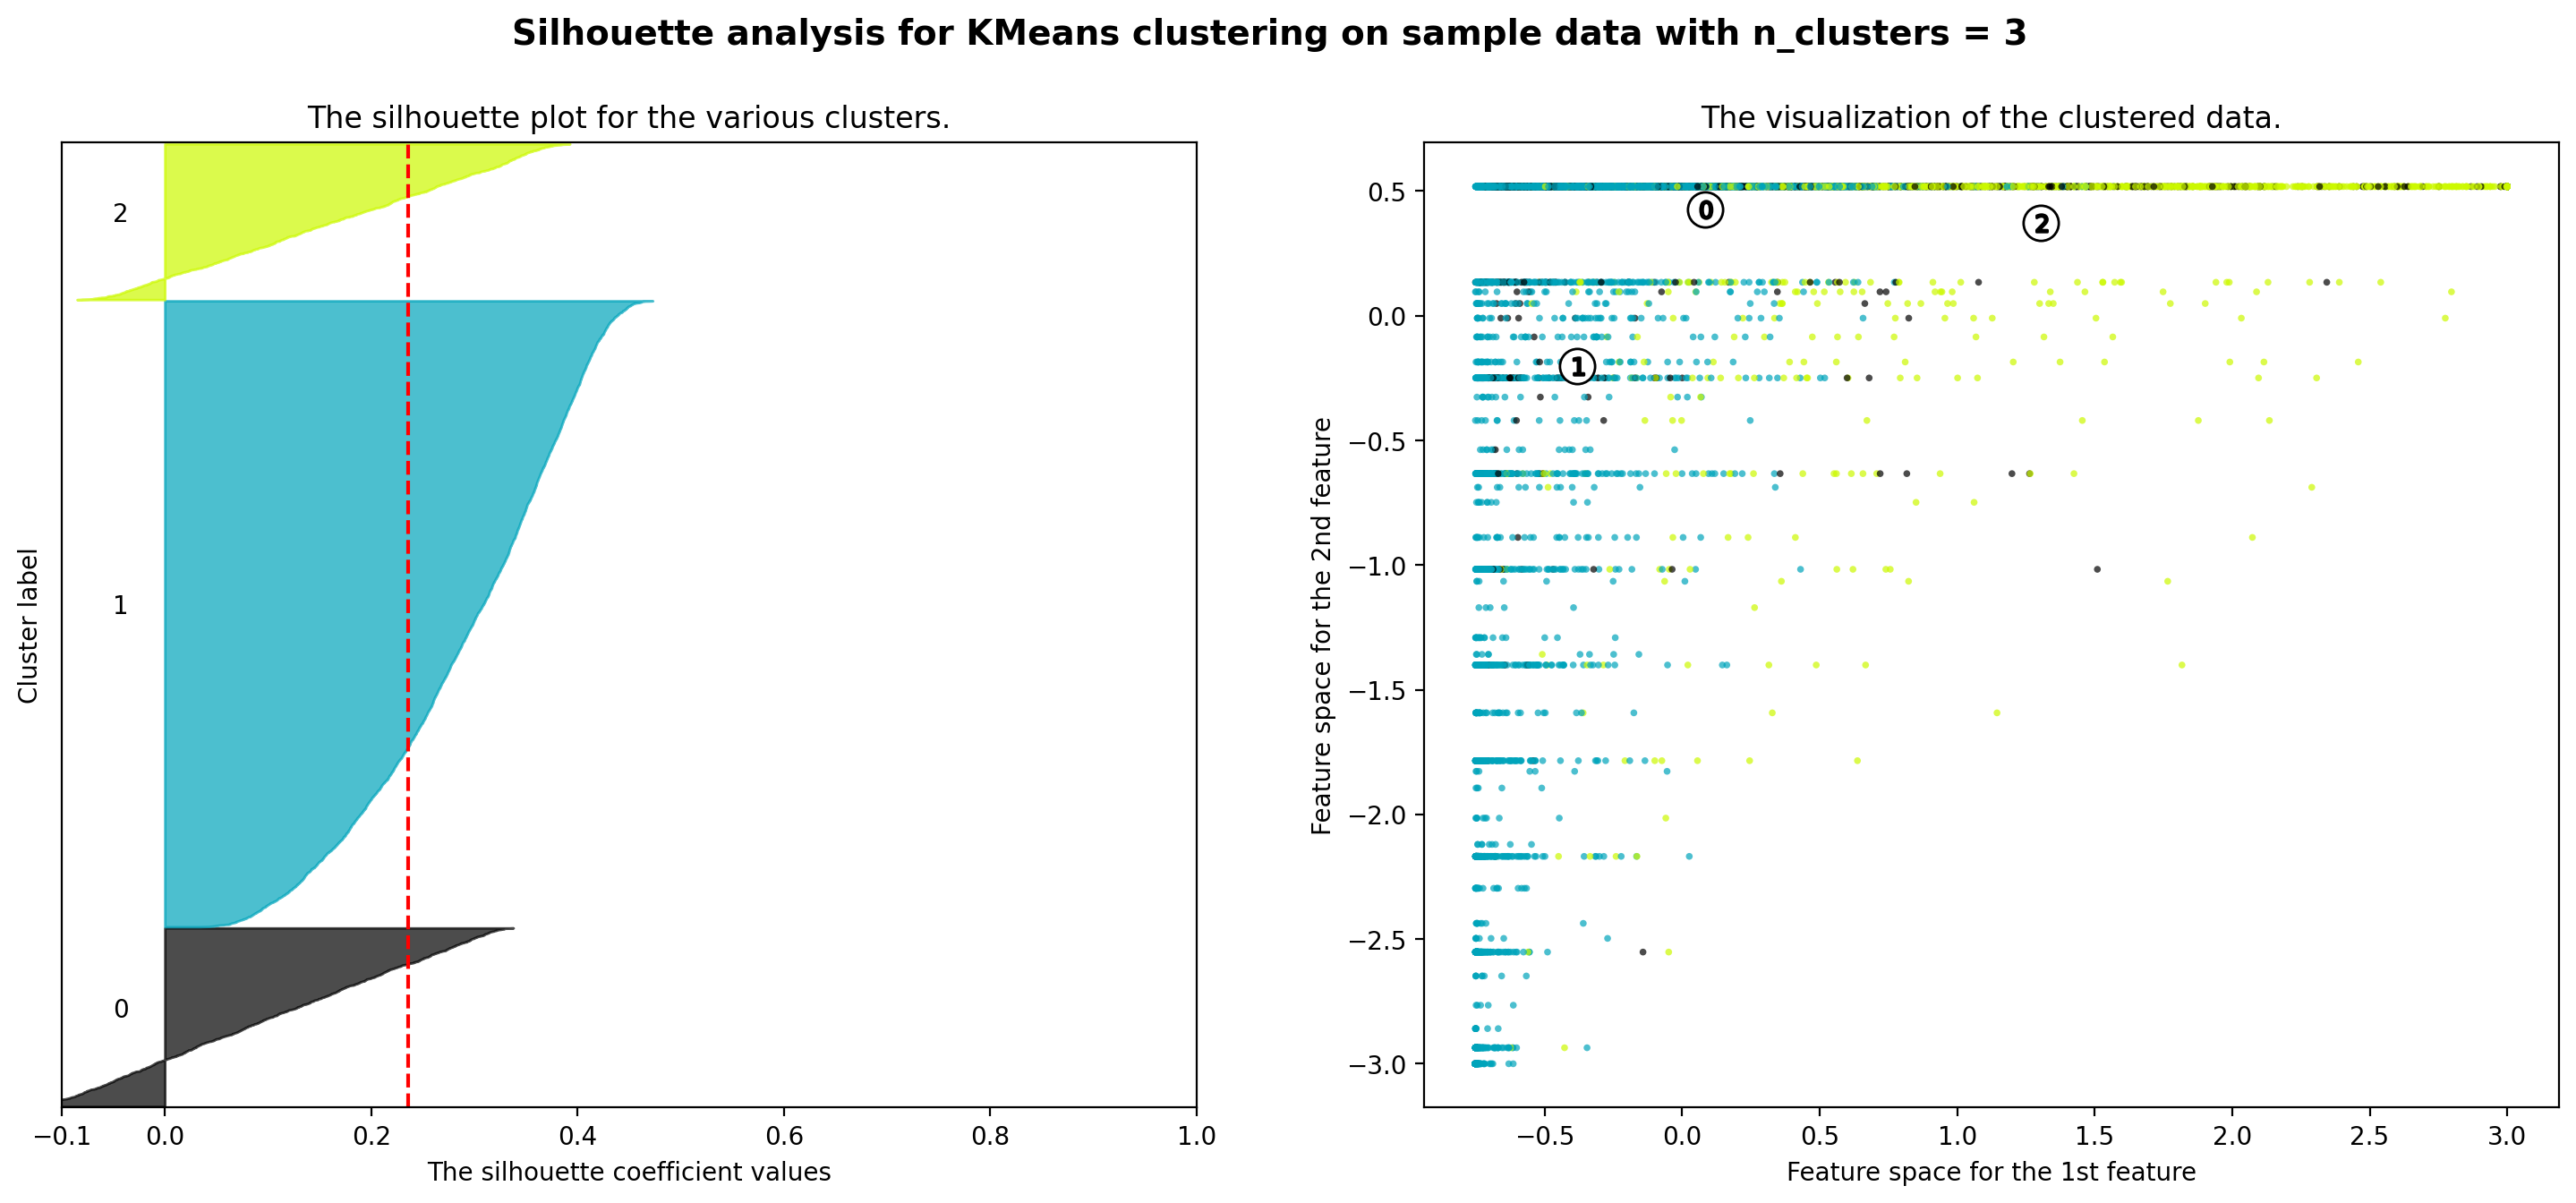

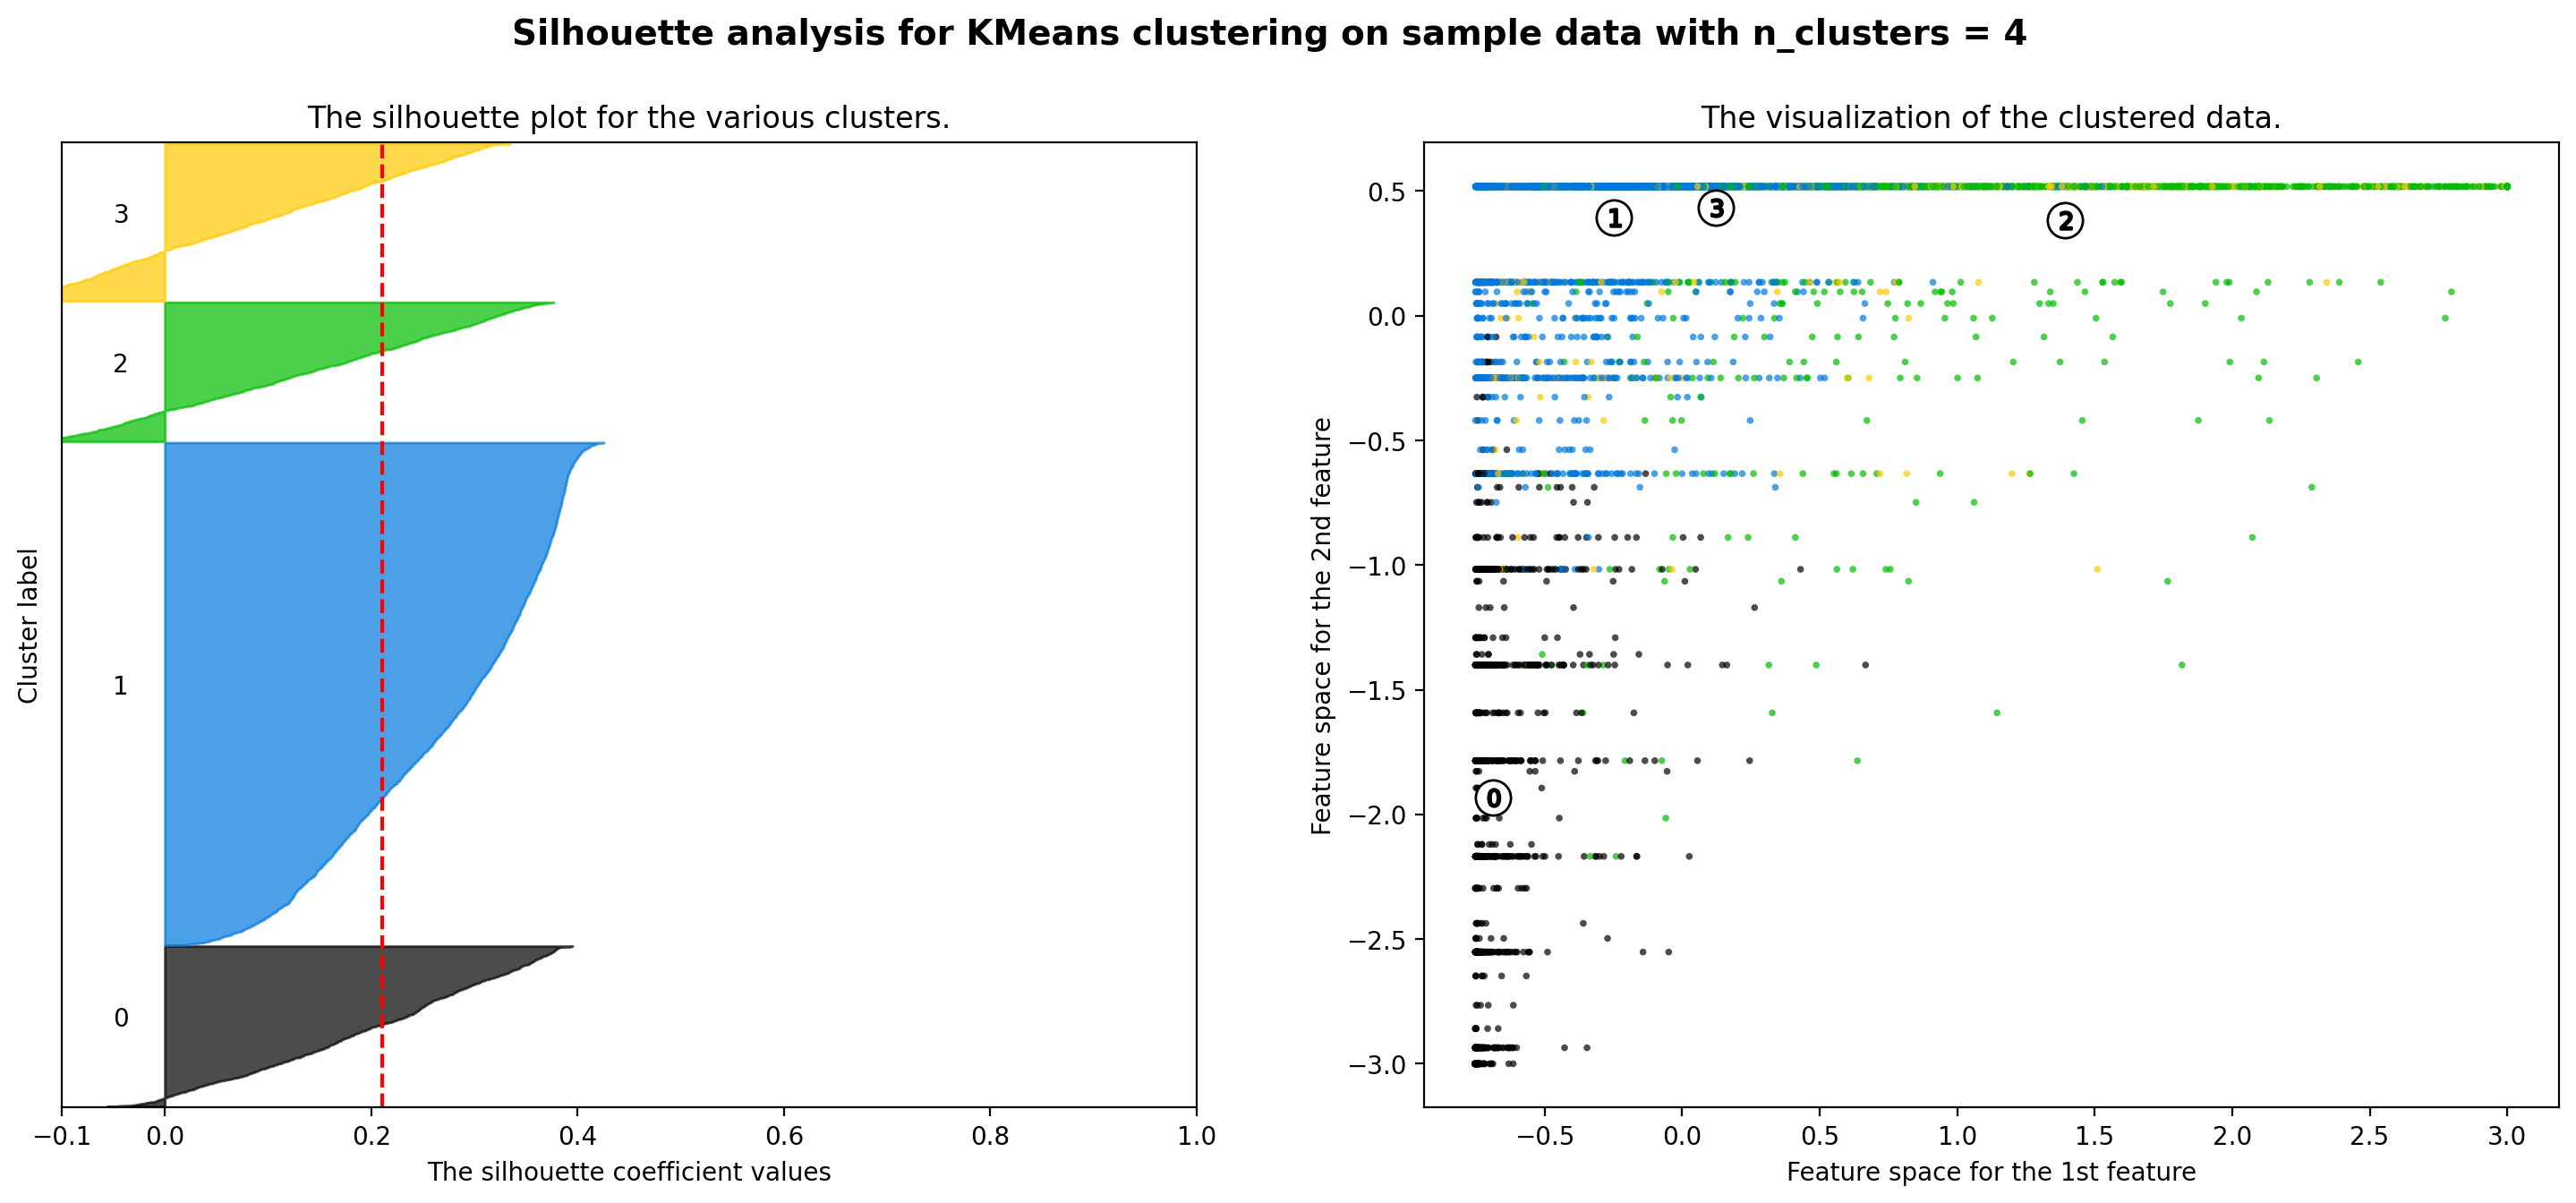

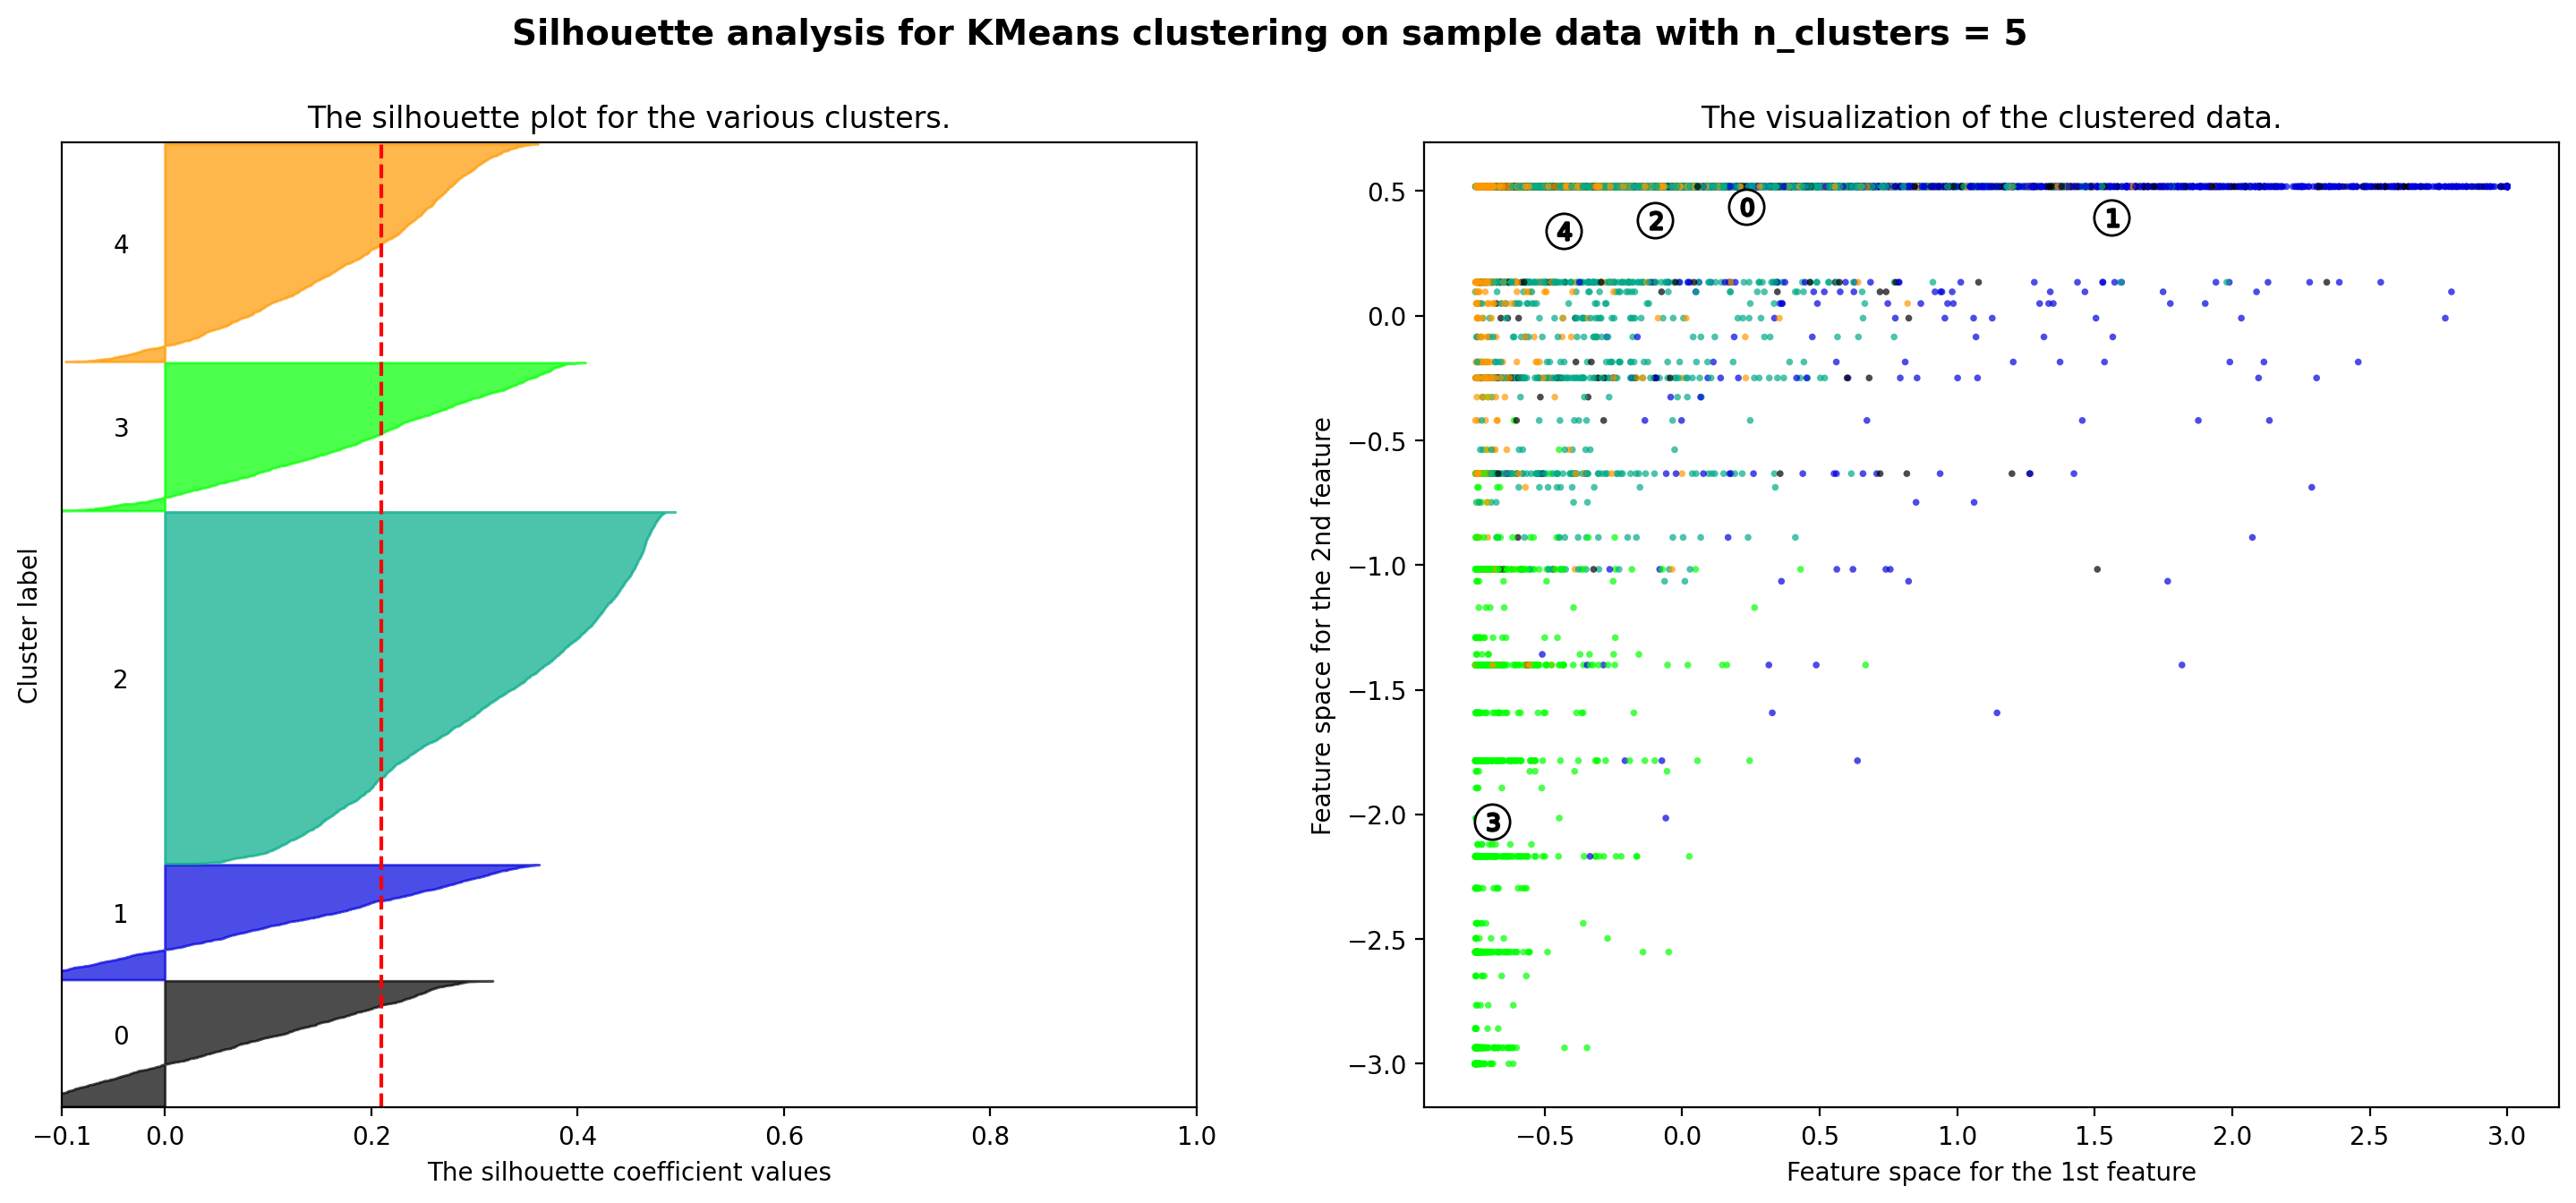

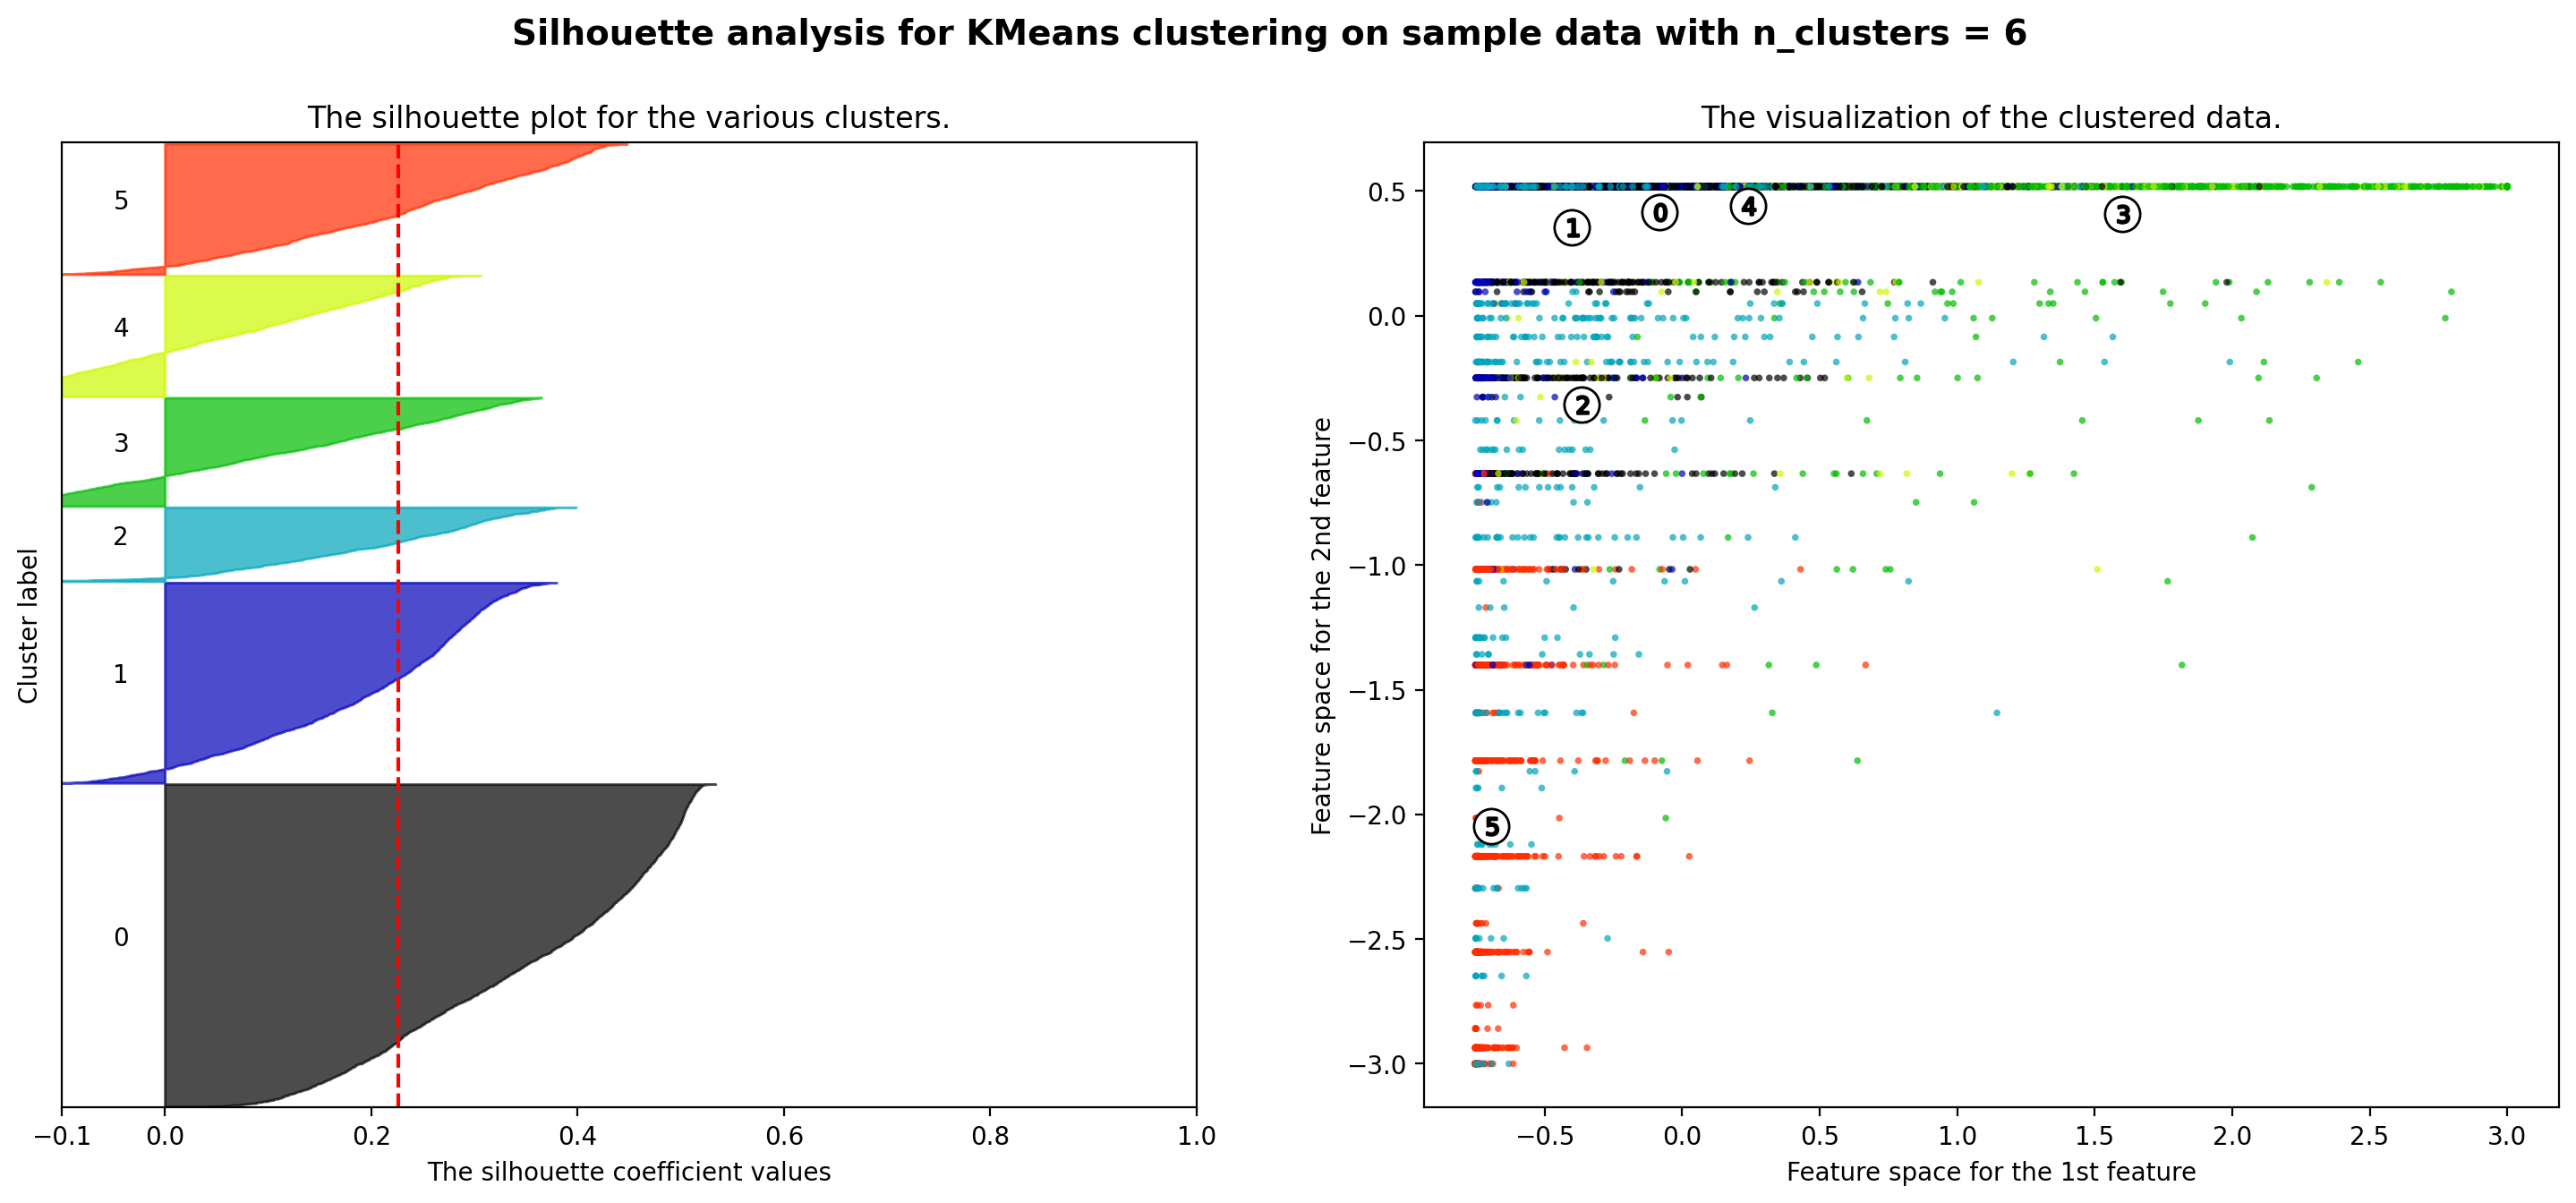

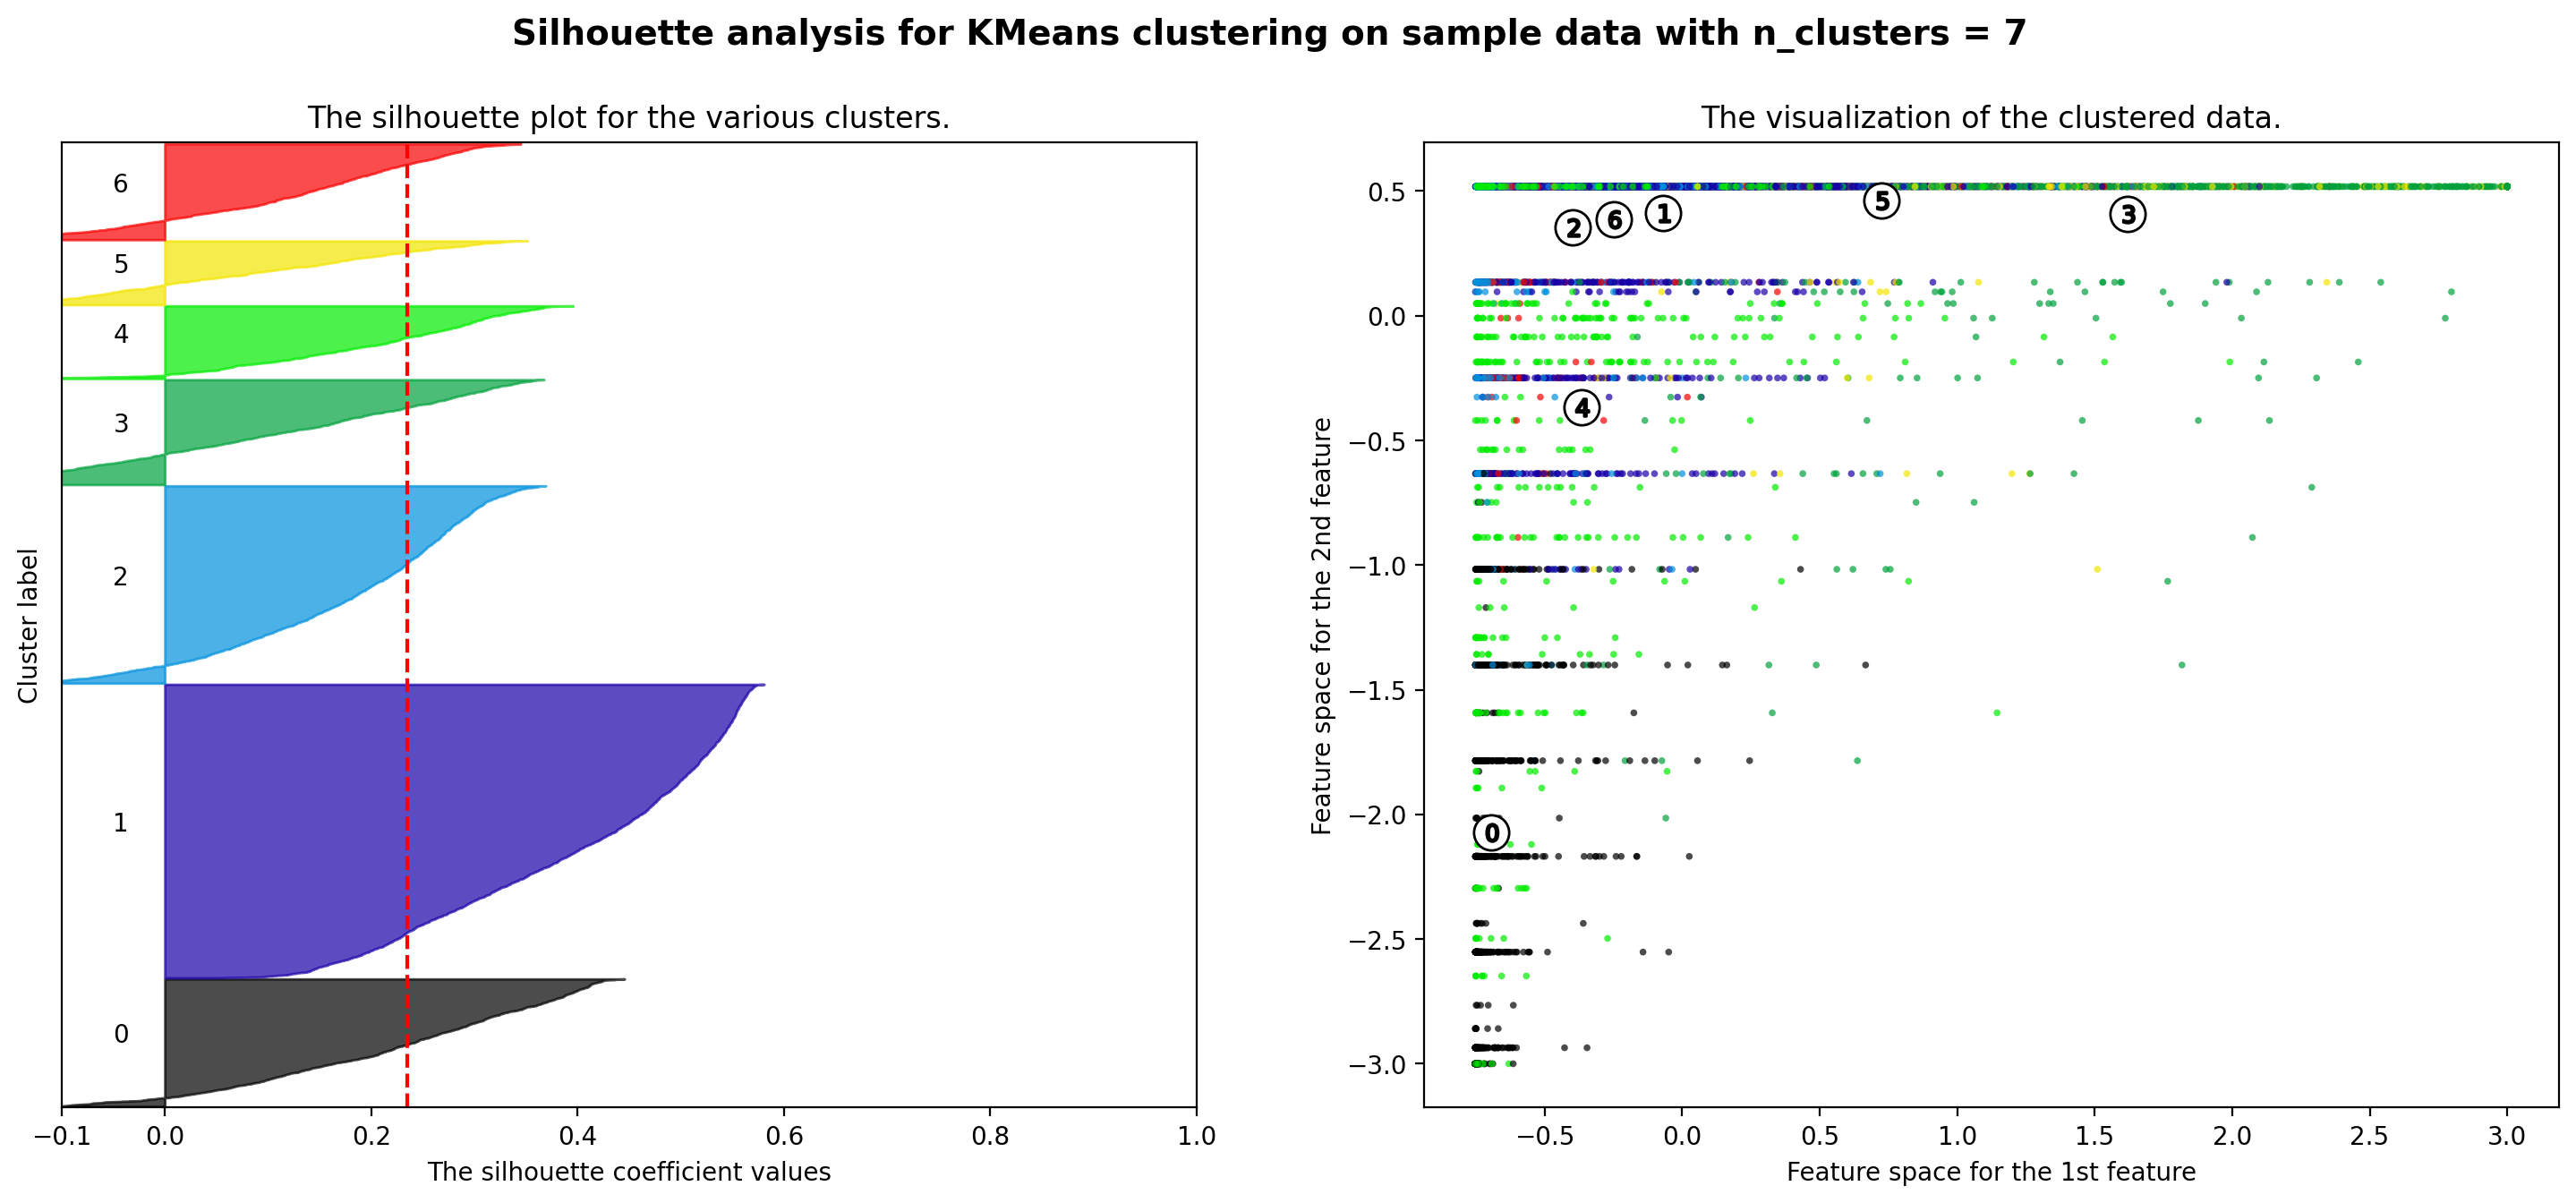

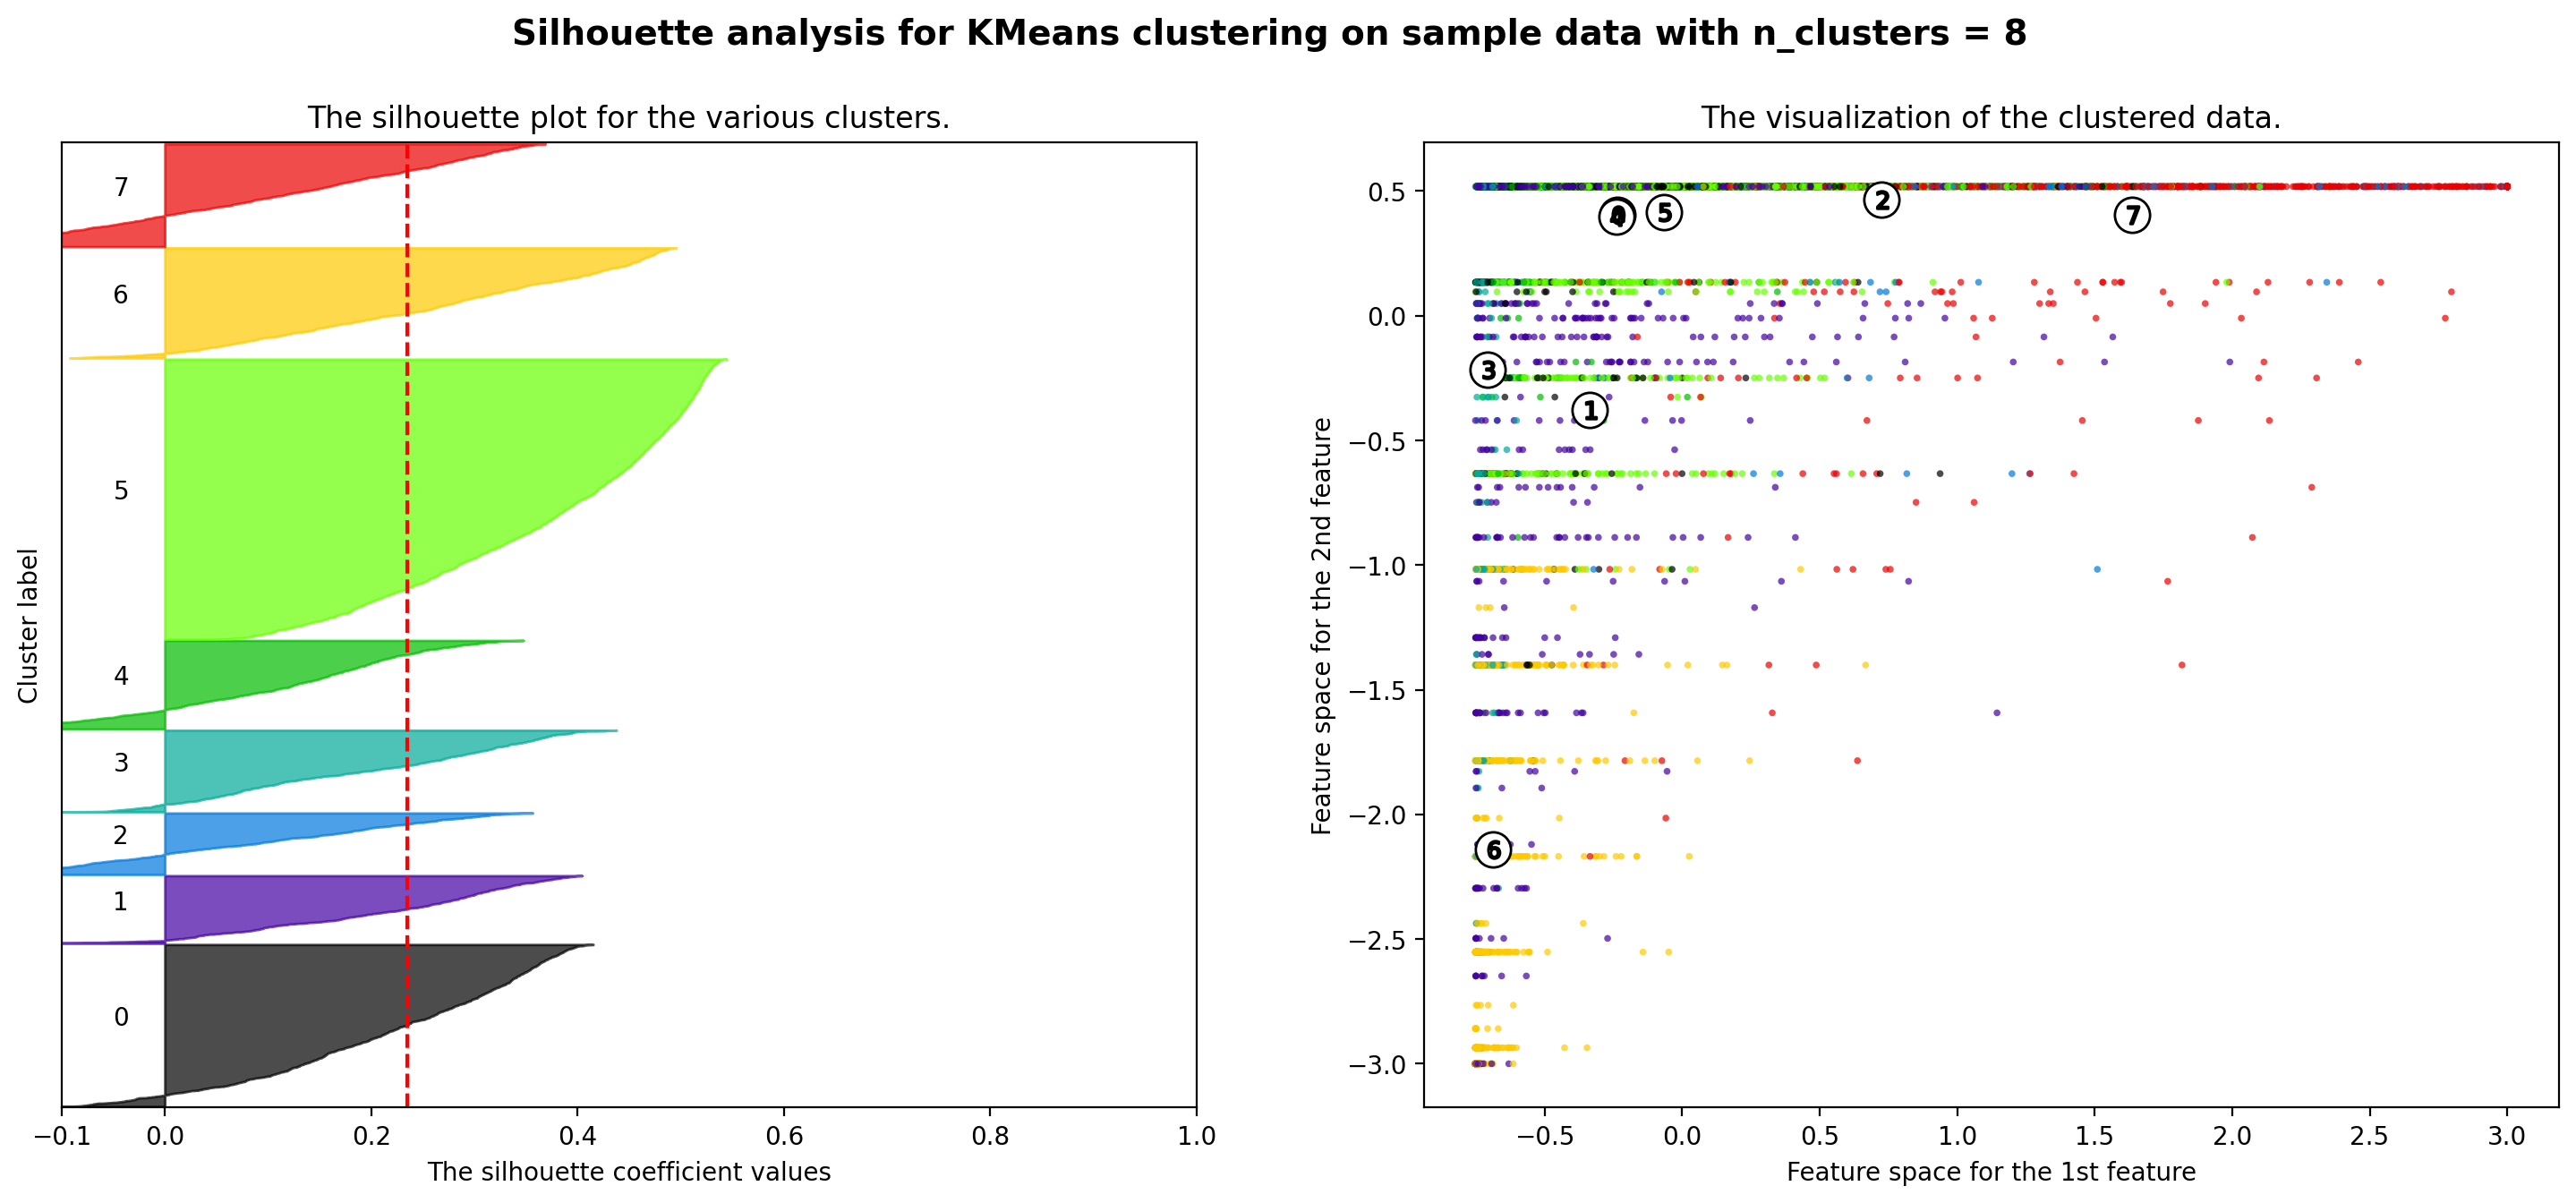

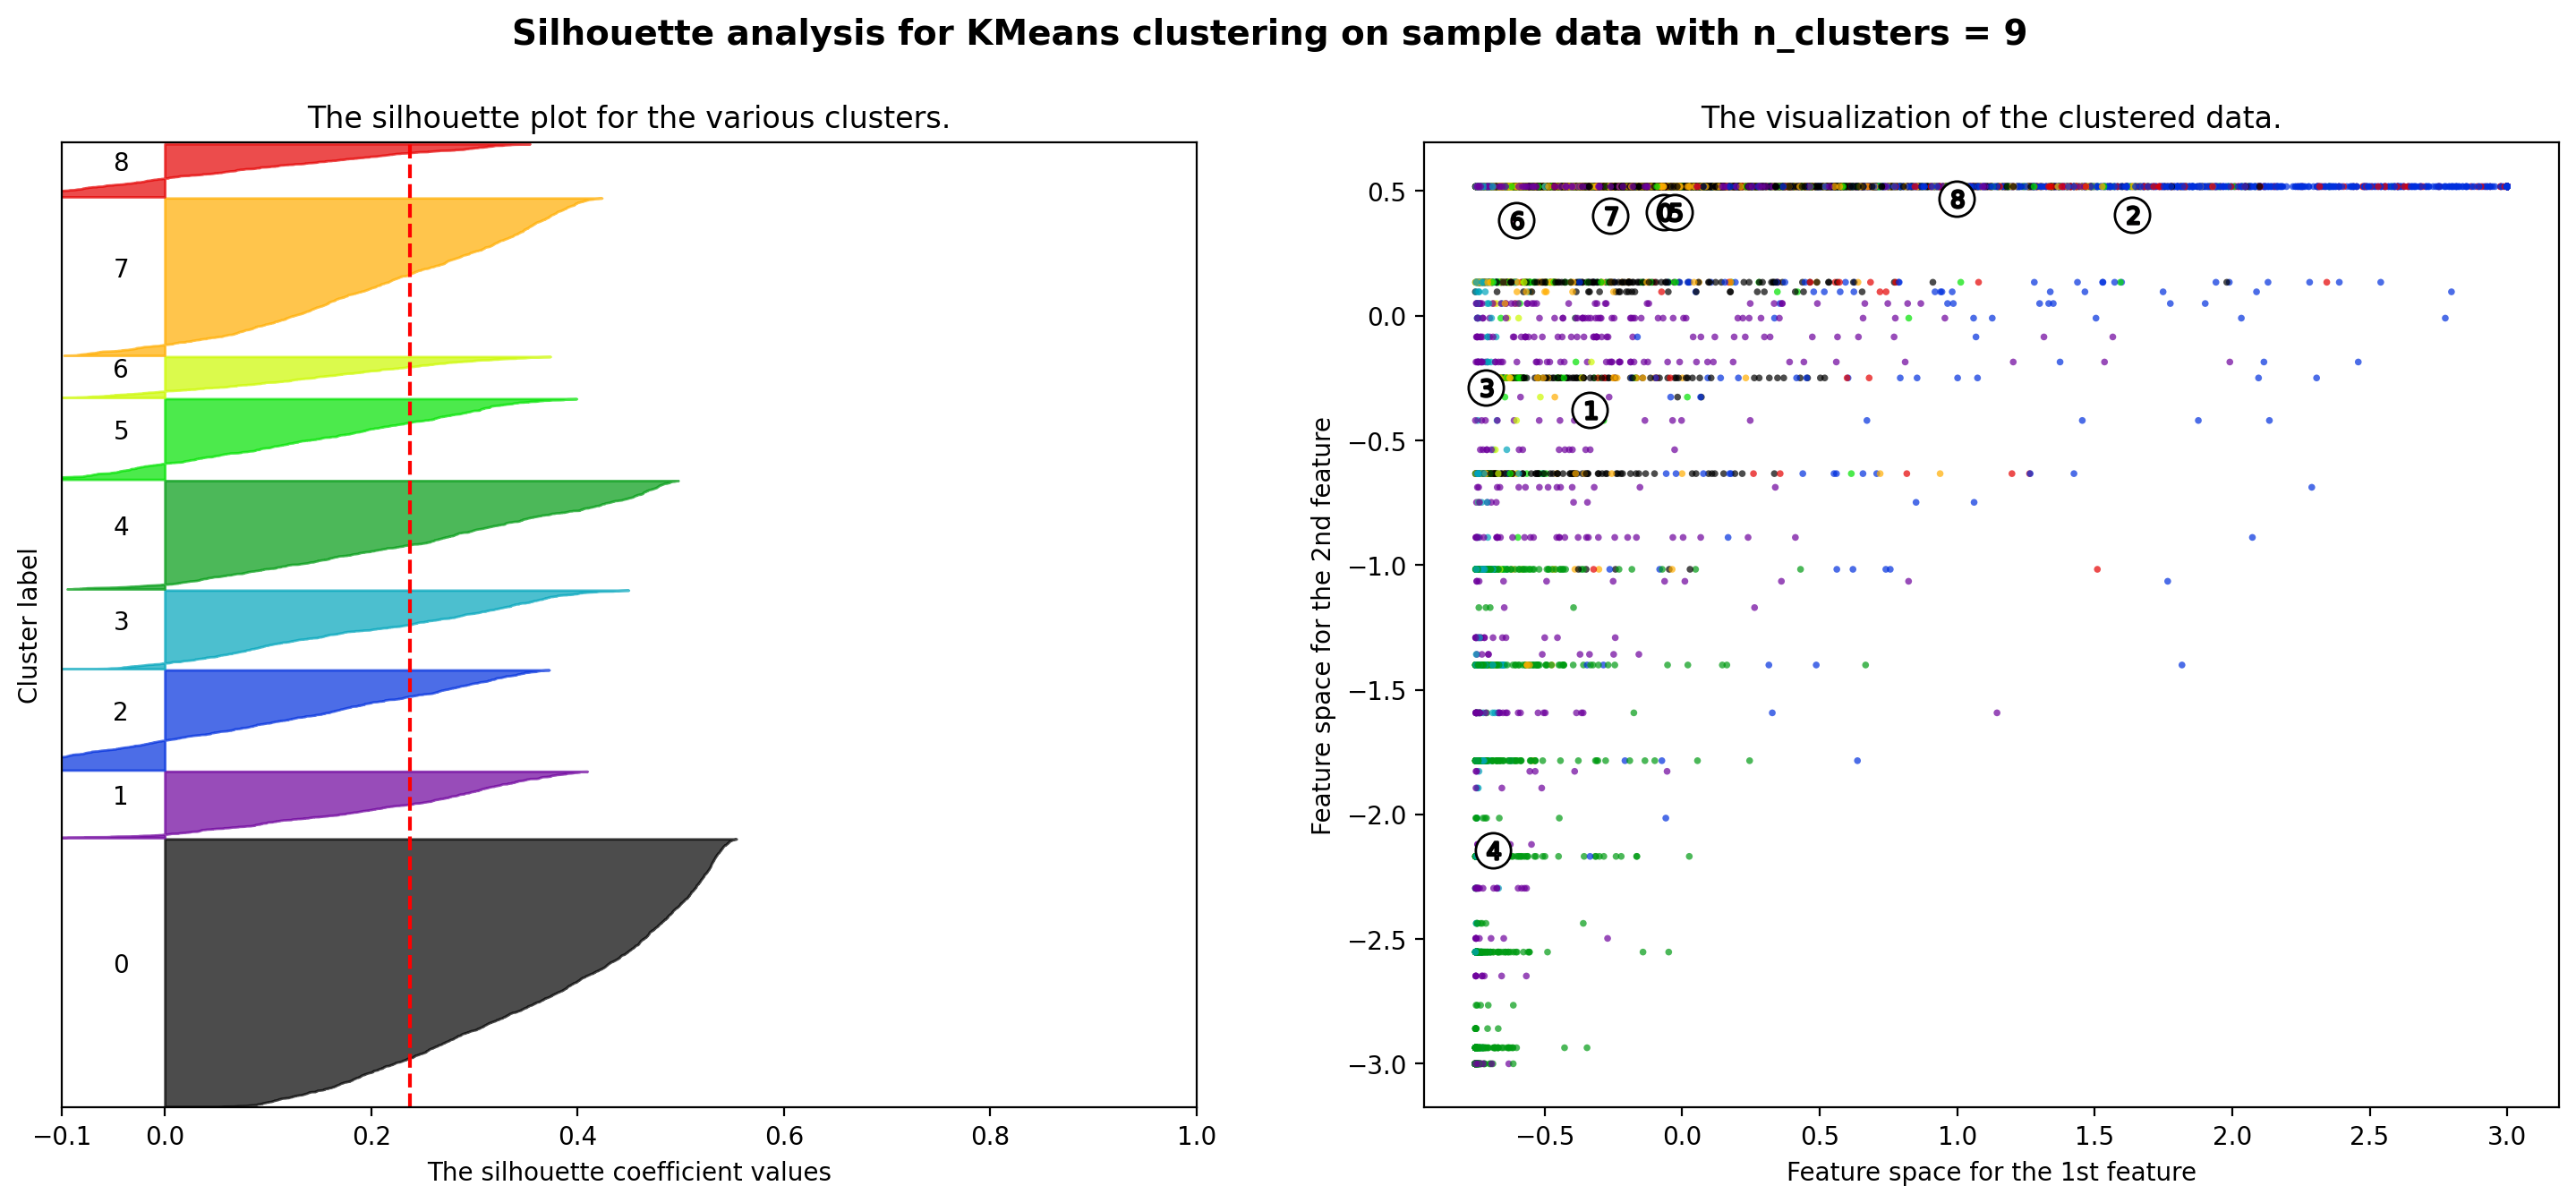

In [44]:
max_n_clusters = 10 # define the max value in the range of k's.

for n_clusters in range(2, max_n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

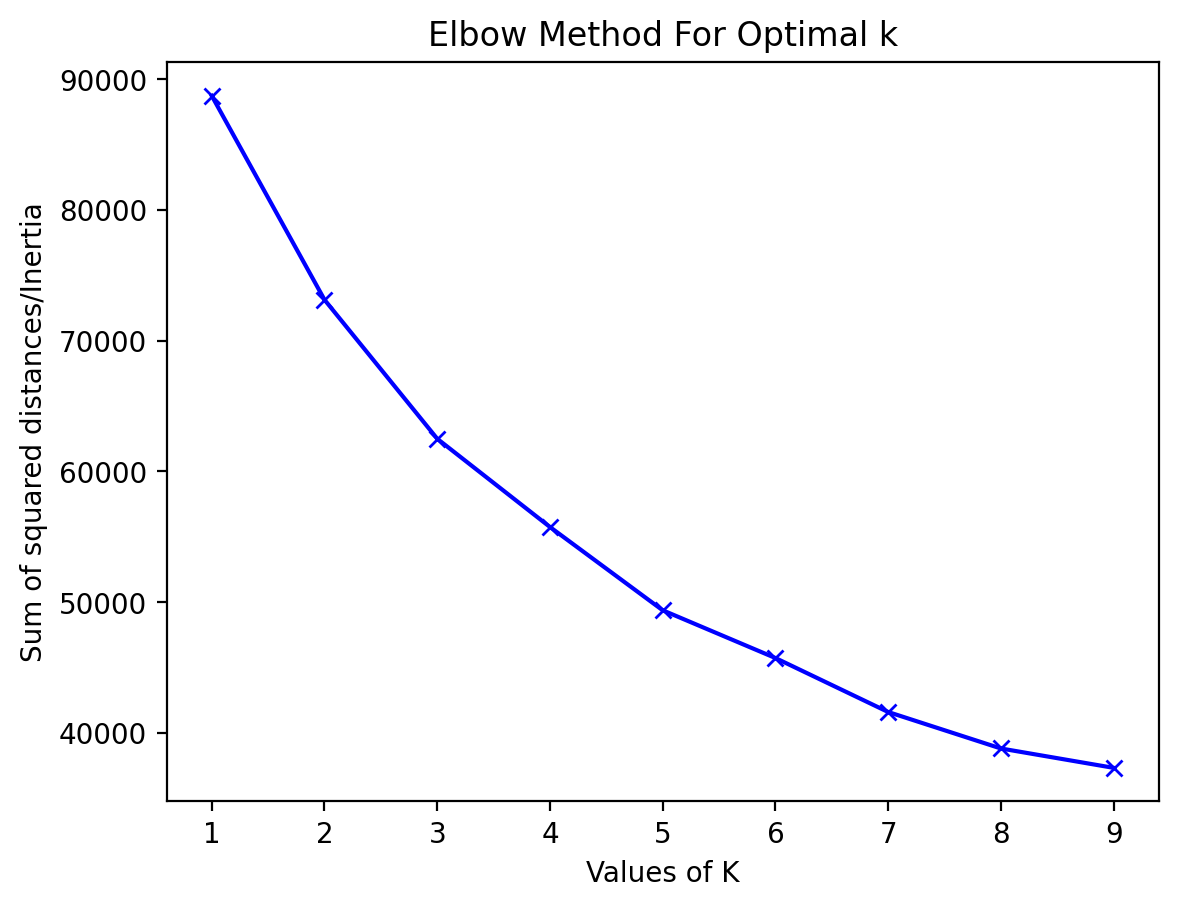

In [46]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_x)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

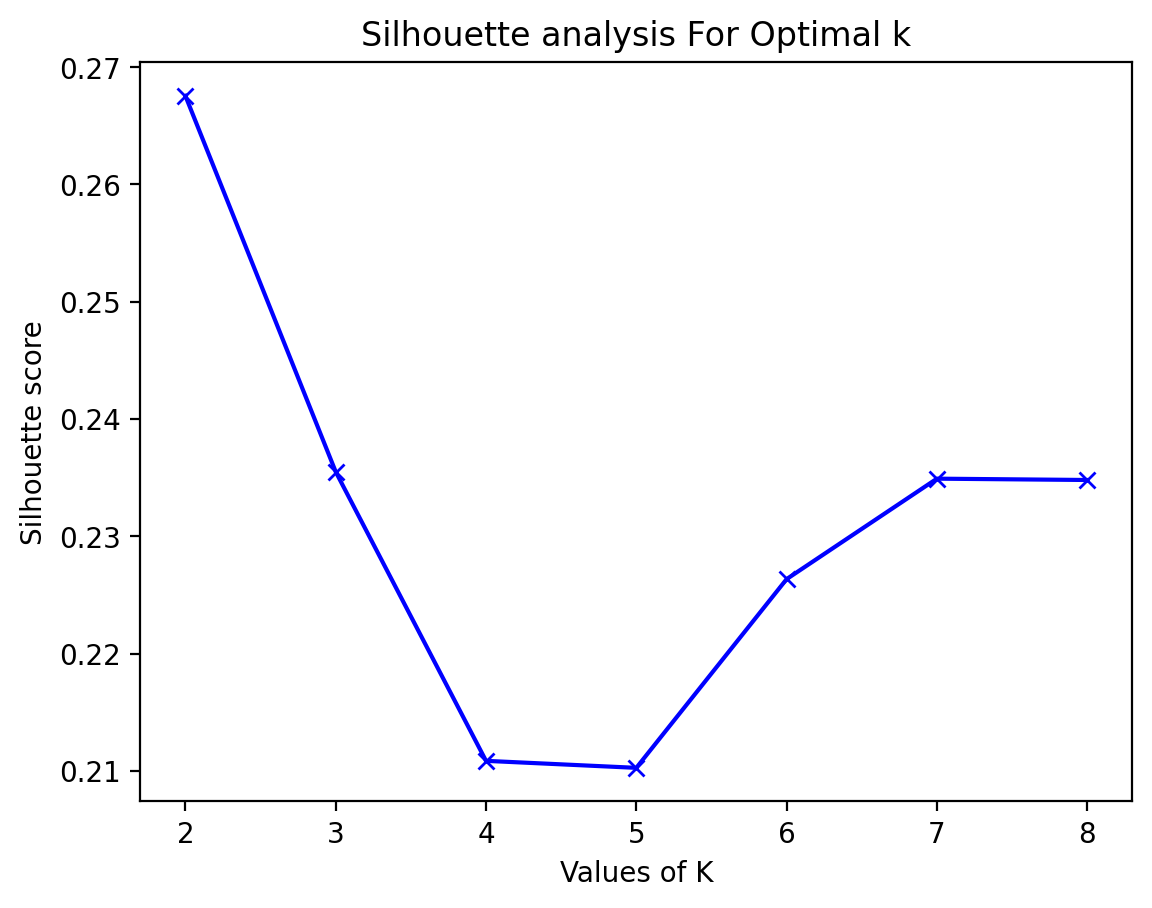

In [52]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_x)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_x, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()